In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'

Welcome to JupyROOT 6.22/09


# Get data from Ntuples to dataframes

In [2]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

# Getting Data

In [3]:
%%time
df = {}
df_trigger = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    df['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    df_trigger['%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    df_trigger['D_%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 5.16 s, sys: 461 ms, total: 5.62 s
Wall time: 5.62 s


In [4]:
print(df['C'].columns)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC',
       'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'evnt'],
      dtype='object')


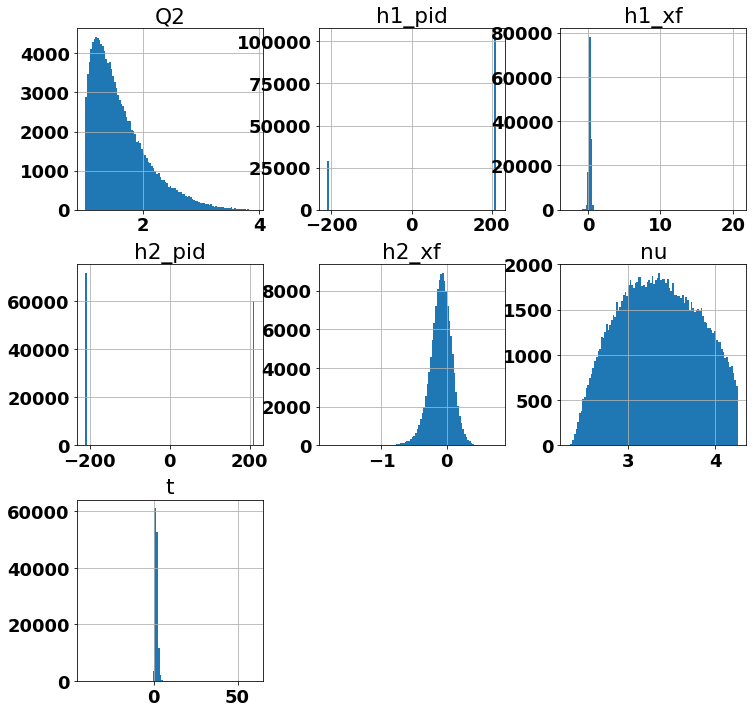

In [5]:
df['C'].hist(figsize=(12,12),bins=100,column=['nu','t','Q2','h2_pid', 'h1_pid','h1_xf', 'h2_xf'])
plt.show()

In [6]:
root_file = rpd.read_root('/home/seba/di-hadron/data/ca/N_clas_42115_15.pass2.root', 'ntuple_data') 
root_file.columns

Index(['Q2', 'Nu', 'Xb', 'vxe', 'vye', 'vze', 'SectorEl', 'TargType', 'Pex',
       'Pey', 'Pez', 'Pe', 'vyec', 'vzec', 'NpheEl', 'FidCheckCutEl',
       'TargTypeSM', 'TargTypeHH', 'CCMirrorMatchingEl', 'SampFractionEl25',
       'SampFractionEl20', 'W', 'Zh', 'Pt2', 'PhiPQ', 'ThetaLab', 'vxh', 'vyh',
       'vzh', 'Sector', 'Px', 'Py', 'Pz', 'P', 'Betta', 'pid', 'T4', 'deltaZ',
       'Nphe', 'evnt', 'FidCheckCutPiPlus', 'StatCC', 'Chi2CC', 'NRowsCC',
       'FidCheckCut', 'SampFraction25', 'SampFraction20', 'CCMirrorMatching',
       'Eh', 'ThetaPQ', 'PhiLab'],
      dtype='object')

# Getting MC (reco)

In [7]:
%%time
df_mc = {}
df_mc_trigger = {}
path_mc="/home/seba/CreatePairTuples"

for target in ['C','D', 'Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mc[target]=getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), target)
    df_mc_trigger['%s_trigger'%target] = getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), 
                                                         '%s_trigger'%target)

Getting dataframes from target C
Getting dataframes from target D
Getting dataframes from target Fe
Getting dataframes from target Pb
CPU times: user 28.8 s, sys: 1.38 s, total: 30.2 s
Wall time: 30.1 s


In [8]:
print(df_mc['C'].keys())
#df_mc['C'].hist(figsize=(12,12),bins=100,column=['nu','W','Q2','h2_pid', 'h1_pid','h1_th', 'h2_th'])


Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'x', 'u',
       'h1_ph', 'h1_th', 'h2_ph', 'h2_th', '__index__'],
      dtype='object')


# Getting GiBUU

In [9]:
%%time

pathGIBUU="/home/miguel/eg2dihadron/"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    df_trigger['GiBUU_%s_trigger'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    df['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (df.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])
CPU times: user 14.9 s, sys: 412 ms, total: 15.3 s
Wall time: 15.3 s


In [10]:
print (df['GiBUU_Fe'].keys())
#df['GiBUU_Fe'].eval('Xb=Q2/(2*0.938272*nu)', inplace=True)
#df['GiBUU_Fe'].hist(figsize=(12,12),bins=100,column=['Xb','nu','W','Q2','h2_pid', 'h1_pid','h1_z', 'h2_th'])
#plt.show()

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2',
       'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'pos_x',
       'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso', 'pos_z_asso',
       '__index__'],
      dtype='object')


# Combine the D2 data-sets

In [11]:
#df['D'] = df['D_Fe']
#df_trigger['D_trigger'] = df_trigger['D_Fe_trigger']
 #df['D'] = pd.concat([df['D_Fe']) #simply combine the deuterium results for all targets
#df_trigger['D_trigger'] = pd.concat([df_trigger['D_Fe_trigger']]) #simply combine the deuterium results for all targets

#print (df.keys())
#print(df['Fe'].keys())
#print(df_trigger['Fe_trigger'].keys())
## this is just to notice that there are no vectors in the variables, all of them are numbers
#print(df['Fe'].describe())
#print('there are ',len(df['Fe']), 'entries')

watching some distributions

In [12]:
#df['Fe'].hist(figsize=(12,12),bins=100,column=['dphi','dphi_lab','h2_cm_th','h2_pid'])
#plt.show()

# Apply selection to datasets
**Here are applied the cuts for GiBUU**

In [13]:
%%time
for key in df.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df[key] = r2h.applyCuts(df[key],isMC=isMC)
    df[key] = r2h.applyCutsPair(df[key],isMC=isMC)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
Nu>2.2 and Nu<4.2 129258  (98.23  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 129258  (100.00  %)
2.2 < nu < 4.2 129258  (100.00  %)
h1_p<5 GeV  129258  (100.00  %)
h2_p<5 GeV 129258  (100.00  %)
secondary hadrons are pions 129258  (100.00  %)
leading hadrons are pions 129258  (100.00  %)
0.2<h2_p<5.0 129258  (100.00  %)
0.2<h1_p<5.0 129258  (100.00  %)
10<h2_th<120 129258  (100.00  %)
Theta/P fiducial region selected 129258  (100.00  %)
10< h1_th<120 129258  (100.00  %)
Theta/P fiducial region selected for trigger 129258  (100.00  %)

key:  D_C
Entries before cut  185530
Q2>1.0 and Q2<4.0 185530  (100.00  %)
h1_p<5.0  185525  (100.00  %)
inelasticity < 0.85 185525  (100.00  %)
h1_pid = pions (trigger) 185525  (100.00  %)
Nu>2.2 and Nu<4.2 182357  (98.29  %)
Starting election on di

In [14]:
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')

C_trigger
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
Nu>2.2 and Nu<4.2 642836  (98.49  %)
 
D_C_trigger
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
Nu>2.2 and Nu<4.2 863117  (98.59  %)
 
Fe_trigger
Entries before cut  763559
Q2>1.0 and Q2<4.0 763558  (100.00  %)
h1_p<5.0  763541  (100.00  %)
inelasticity < 0.85 763541  (100.00  %)
h1_pid = pions (trigger) 763541  (100.00  %)
Nu>2.2 and Nu<4.2 752453  (98.55  %)
 
D_Fe_trigger
Entries before cut  1296921
Q2>1.0 and Q2<4.0 1296921  (100.00  %)
h1_p<5.0  1296899  (100.00  %)
inelasticity < 0.85 1296899  (100.00  %)
h1_pid = pions (trigger) 1296899  (100.00  %)
Nu>2.2 and Nu<4.2 1280653  (98.75  %)
 
Pb_trigger
Entries before cut  284036
Q2>1.0 and Q2<4.0 284036  (100.00 

# Apply selection to MC

In [15]:
%%time
for key in df_mc.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print (key)
    df_mc[key] = r2h.applyCuts(df_mc[key],isMC=isMC)
    df_mc[key] = r2h.applyCutsPair(df_mc[key],isMC=isMC)    
    df_mc[key] = r2h.applyCuts(df_mc[key],isMC=isMC)
    df_mc[key] = r2h.applyCutsPair(df_mc[key],isMC=isMC)

C
Entries before cut  2153884
Q2>1.0 and Q2<4.0 2153884  (100.00  %)
h1_p<5.0  2153883  (100.00  %)
inelasticity < 0.85 2153883  (100.00  %)
h1_pid = pions (trigger) 675859  (31.38  %)
Nu>2.2 and Nu<4.2 661810  (97.92  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 661810  (100.00  %)
2.2 < nu < 4.2 661810  (100.00  %)
h1_p<5 GeV  661810  (100.00  %)
h2_p<5 GeV 661810  (100.00  %)
secondary hadrons are pions 315828  (47.72  %)
leading hadrons are pions 315828  (100.00  %)
0.2<h2_p<5.0 315828  (100.00  %)
0.2<h1_p<5.0 315828  (100.00  %)
10<h2_th<120 315828  (100.00  %)
Theta/P fiducial region selected 315828  (100.00  %)
10< h1_th<120 315828  (100.00  %)
Theta/P fiducial region selected for trigger 315828  (100.00  %)
Entries before cut  315828
Q2>1.0 and Q2<4.0 315828  (100.00  %)
h1_p<5.0  315828  (100.00  %)
inelasticity < 0.85 315828  (100.00  %)
h1_pid = pions (trigger) 315828  (100.00  %)
Nu>2.2 and Nu<4.2 315828  (100.00  %)
Starting election on dipion variables


In [16]:
for key in df_mc_trigger.keys():
    print (key)
    df_mc_trigger[key] = r2h.applyCuts(df_mc_trigger[key],isTrigger=True)
    print (' ')

C_trigger
Entries before cut  6089605
Q2>1.0 and Q2<4.0 6089605  (100.00  %)
h1_p<5.0  6089597  (100.00  %)
inelasticity < 0.85 6089597  (100.00  %)
h1_pid = pions (trigger) 2407780  (39.54  %)
Nu>2.2 and Nu<4.2 2375046  (98.64  %)
 
D_trigger
Entries before cut  6209074
Q2>1.0 and Q2<4.0 6209074  (100.00  %)
h1_p<5.0  6209063  (100.00  %)
inelasticity < 0.85 6209063  (100.00  %)
h1_pid = pions (trigger) 2433455  (39.19  %)
Nu>2.2 and Nu<4.2 2400600  (98.65  %)
 
Fe_trigger
Entries before cut  5655162
Q2>1.0 and Q2<4.0 5655162  (100.00  %)
h1_p<5.0  5655151  (100.00  %)
inelasticity < 0.85 5655151  (100.00  %)
h1_pid = pions (trigger) 2239295  (39.60  %)
Nu>2.2 and Nu<4.2 2208274  (98.61  %)
 
Pb_trigger
Entries before cut  5957337
Q2>1.0 and Q2<4.0 5957337  (100.00  %)
h1_p<5.0  5957328  (100.00  %)
inelasticity < 0.85 5957328  (100.00  %)
h1_pid = pions (trigger) 2360420  (39.62  %)
Nu>2.2 and Nu<4.2 2327596  (98.61  %)
 


**Checking some distributions**

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2',
       'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'pos_x',
       'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso', 'pos_z_asso', '__index__',
       'inelasticity', 'h1_e', 'h1_p', 'h2_e', 'h2_p', 'pair_pt2'],
      dtype='object')


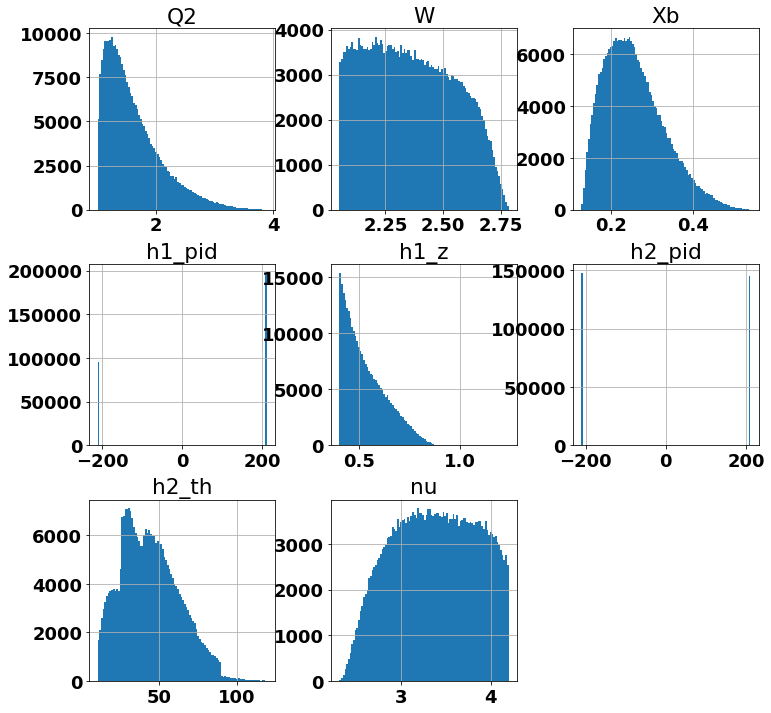

In [17]:
print (df['GiBUU_Fe'].keys())
df_mc['Fe'].eval('Xb=Q2/(2*0.938272*nu)', inplace=True)
df_mc['Fe'].hist(figsize=(12,12),bins=100,column=['Xb','nu','W','Q2','h2_pid', 'h1_pid','h1_z', 'h2_th'])
plt.show()


# R_2h data from HERMES and Neutrino buble-chamber experiment

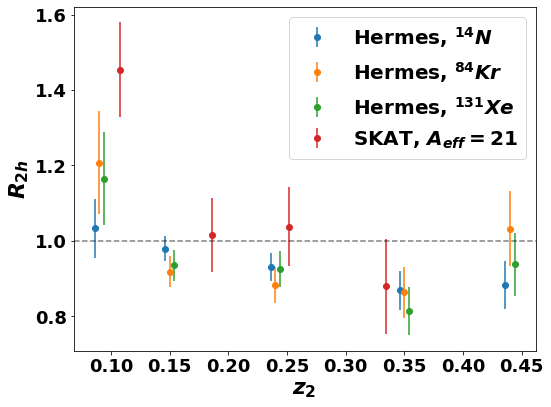

In [18]:
#hermes data:
hermes_y = {}
hermes_ystat = {}
hermes_ysyst = {}
hermes_ytotal = {}

#DATA FROM SELECTIO1 OF http://www-hermes.desy.de/notes/pub/publications.html
hermes_x = {}
hermes_x['Kr'] = [0.09,0.15,0.24,0.35,0.44]
hermes_x['N'] = np.subtract(hermes_x['Kr'],0.004)
hermes_x['Xe'] = np.subtract(hermes_x['Kr'],-0.004)

#nitrogen, atomic number 7
hermes_y['N']     = [1.0324, 0.9781,0.9293,0.8678,0.8822]
hermes_ystat['N'] = [0.0767,0.0268,0.0323,0.0478,0.0601]
hermes_ysyst['N'] = [0.0206,0.0196,0.0186,0.0174,0.0176]
hermes_ytotal['N'] = np.sqrt(np.power(hermes_ystat['N'],2.0)+np.power(hermes_ysyst['N'],2.0))

#krypton, atomic number 36
hermes_y['Kr'] = [1.2072,0.9180,0.8822,0.8631,1.0314]
hermes_ystat['Kr'] = [0.1342,0.0366,0.0452,0.0661,0.0972]
hermes_ysyst['Kr'] =[0.0241,0.0184,0.0176,0.0173,0.0206]
hermes_ytotal['Kr'] = np.sqrt(np.power(hermes_ystat['Kr'],2.0)+np.power(hermes_ysyst['Kr'],2.0))

hermes_y['Xe'] = [1.1648,0.9345,0.9242,0.8128,0.9373]
hermes_ystat['Xe'] = [0.1205,0.0359,0.0433,0.0614,0.0808]
hermes_ysyst['Xe'] = [0.0233,0.0187,0.0185,0.0163,0.0187]
hermes_ytotal['Xe'] = np.sqrt(np.power(hermes_ystat['Xe'],2.0)+np.power(hermes_ysyst['Xe'],2.0))

neutrino_x = [0.10763636363636367, 0.18618181818181817,0.25163636363636366,0.3345454545454546]
neutrino_y = [1.4535664335664338, 1.0148378893833438,  1.0373426573426574, 0.8784361093452003]
neutrino_yerror =[1.5794405594405596, 1.112739987285442, 1.1422377622377624,1.004310235219326]
neutrino_yerror = np.subtract(neutrino_yerror,neutrino_y)

fig = plt.figure(figsize=(8,6))

plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],label='Hermes, $^{14}N$',fmt='o')
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],label='Hermes, $^{84}Kr$',fmt='o')
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],label='Hermes, $^{131}Xe$',fmt='o')
plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,label='SKAT, $A_{eff}=21$',fmt='o')
plt.xlabel('$z_{2}$',fontsize=22)
plt.ylabel('$R_{2h}$',fontsize=22)
plt.axhline(y=1.0,color='black',linestyle='--',alpha=0.5)

plt.tight_layout()
plt.legend(frameon=True)
#plt.savefig('PreviousData.png')
#plt.savefig('PreviousData_R2h.pdf')

plt.show()



In [19]:
p_thr=2.7
Nphe_thr=15
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

pair_cut_nom  ='and h1_z>0.5 and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h2_FidCut==1 and %s and %s and %s and %s and %s and %s'%(Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
trigger_cut_nom   ='h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)



Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

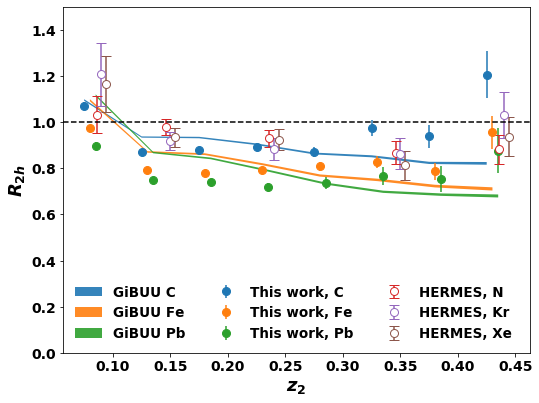

In [20]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
for i,target in enumerate(['C','Fe','Pb']):    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
    #plt.plot(x,r,label='GiBUU %s'%target,alpha=0.79,lw=3,color=colors[target])
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,fmt='o',ms=8)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)


plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],fmt='o',mfc='white',
             label='HERMES, N',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],fmt='o',mfc='white',
             label='HERMES, Kr',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],fmt='o',mfc='white',
             label='HERMES, Xe',fillstyle=None,ms=8,capsize=5)
#plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,fmt='s',mfc='white',
            #label='Neutrino, $A_{eff}=21$',fillstyle=None,ms=8,capsize=5)

plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('ComparisonWithHermes_Linear.pdf', bbox_inches='tight')
plt.show()

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5


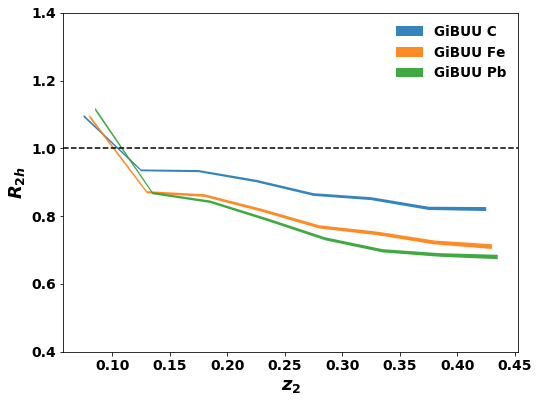

In [21]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
    #plt.plot(x,r,label='GiBUU %s'%target,alpha=0.79,lw=3,color=colors[target])
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,fmt='o',ms=8)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)



plt.ylim([0.4,1.4])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=1 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('ComparisonWithHermes_Linear_tmp.pdf', bbox_inches='tight')
plt.show()

**Comaprison only with HERMES**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

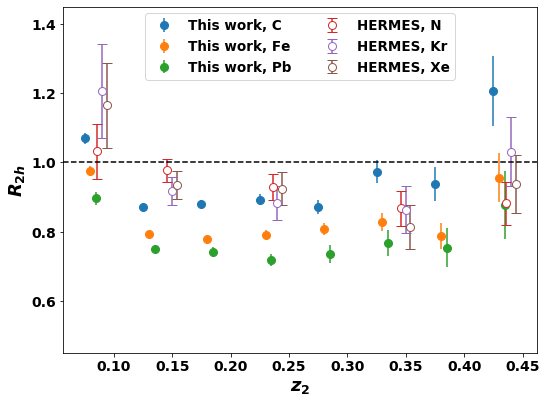

In [22]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)
for i,target in enumerate(['C','Fe','Pb']): 
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
    #plt.plot(x,r,label='GiBUU %s'%target,alpha=0.79,lw=3,color=colors[target])
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,fmt='o',ms=8)
    #plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)

plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],fmt='o',mfc='white',
             label='HERMES, N',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],fmt='o',mfc='white',
             label='HERMES, Kr',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],fmt='o',mfc='white',
             label='HERMES, Xe',fillstyle=None,ms=8,capsize=5)
#plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,fmt='s',mfc='white',
            #label='Neutrino, $A_{eff}=21$',fillstyle=None,ms=8,capsize=5)

plt.ylim([0.45,1.45])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper center',frameon=True,fontsize=13.5,ncol=2 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('ComparisonWithHERMES_noGiBUU.pdf', bbox_inches='tight')
plt.show()

**Comparison with z1+z2<0.8 cut**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

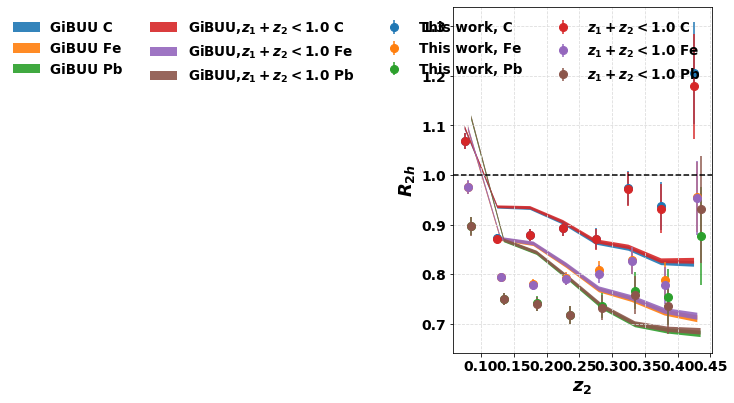

In [23]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = pair_cut_nom,
                        trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = '%s and (h1_z+h2_z)<1.0'%pair_cut_nom,
                        trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r2,yerr=err2,label='$z_{1}+z_{2}<1.0$ %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
        
    
    
    
for i,target in enumerate(['C','Fe','Pb']):    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)

for i,target in enumerate(['C','Fe','Pb']):    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and  (h1_z+h2_z)<1.0')
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU,$z_{1}+z_{2}<1.0$ %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)

#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=4 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


#plt.savefig('ComparisonR2h_z1z2less08.pdf', bbox_inches='tight')
plt.show()

**Comparison with single-hadron suppression**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

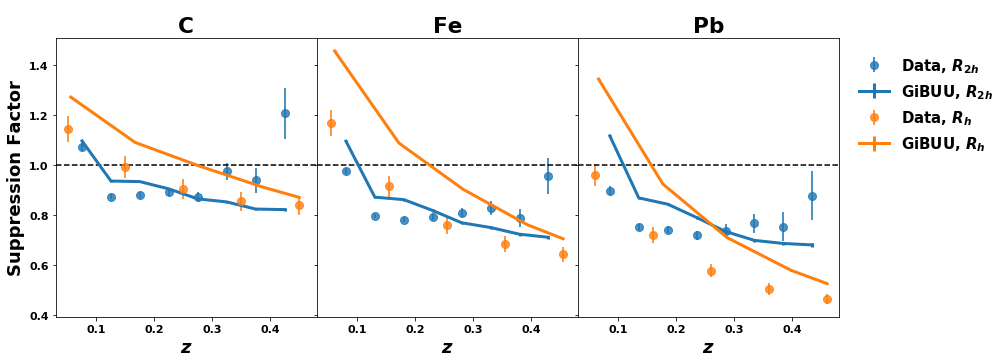

In [24]:
x_data_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45])
y_data_singleHadron = {}
erry_data_singleHadron  ={}

y_data_singleHadron['pip_C'] = np.array([1.14377 , 0.991528 , 0.902358 , 0.853406 , 0.837642 ])
erry_data_singleHadron['pip_C'] = np.array([0.00311613 , 0.00157512 , 0.001843 , 0.00229271 , 0.00291008 ])
y_data_singleHadron['pip_Fe'] = np.array([1.16785 , 0.914393 , 0.758705 , 0.683655 , 0.642149 ])
erry_data_singleHadron['pip_Fe'] = np.array([0.00285128 , 0.00131102 , 0.00141581 , 0.00169536 , 0.00206393  ])
y_data_singleHadron['pip_Pb'] = np.array([0.958606 , 0.719983 , 0.57628 , 0.503447 , 0.464043  ])
erry_data_singleHadron['pip_Pb'] = np.array([0.00273899 , 0.00124261 , 0.00132827 , 0.00159042 , 0.00194019 ])

x_data_pim_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75])

y_data_singleHadron['pim_C'] = np.array([ 1.14172 , 0.992301 , 0.904382 , 0.858762 , 0.814561 ])
erry_data_singleHadron['pim_C'] = np.array([0.0054489 , 0.00266114 , 0.00303142 , 0.00430438 , 0.00651458  ])
y_data_singleHadron['pim_Fe'] = np.array([1.18926 , 0.949964 , 0.802236 , 0.717104 , 0.656101 ])
erry_data_singleHadron['pim_Fe'] = np.array([0.00532453 , 0.00237637 , 0.00250118 , 0.00334693 , 0.00490003  ])
y_data_singleHadron['pim_Pb'] = np.array([1.07461 , 0.826597 , 0.668954 , 0.571658 , 0.511301 ]) 
erry_data_singleHadron['pim_Pb'] = np.array([0.00523426 , 0.00230227 , 0.00241594 , 0.00321067 , 0.00467534  ])


y_GiBUU_singleHadron = {}
erry_GiBUU_singleHadron  ={}
x_GiBUU_singleHadron = np.array([0.05555556 ,0.16666667 ,0.27777778 ,0.38888889, 0.45  ])


y_GiBUU_singleHadron['pip_C']=np.array([1.2706959,  1.08947724, 0.99504182, 0.90983822, 0.87008815])
y_GiBUU_singleHadron['pip_Fe']=np.array([1.45474057, 1.08676467, 0.90162779, 0.75997446, 0.70464241])
y_GiBUU_singleHadron['pip_Pb']=np.array([1.34267664, 0.92325242 ,0.70871029, 0.57738503, 0.52548756])
y_GiBUU_singleHadron['pim_C']=np.array([1.15775933 ,1.00102127, 0.96162586, 0.89191957, 0.85893181])
y_GiBUU_singleHadron['pim_Fe']=np.array([1.25795649 ,0.95501298, 0.85133908, 0.73355979, 0.68619796])
y_GiBUU_singleHadron['pim_Pb']=np.array([1.50585669 ,1.00346182, 0.83044466, 0.65311636, 0.58317362])

erry_GiBUU_singleHadron['pip_C']=np.array([0.00178479 ,0.00118499 ,0.00151467, 0.00174534, 0.00196202])
erry_GiBUU_singleHadron['pip_Fe']=np.array([0.00225931, 0.00137018 ,0.0016492 , 0.00181247, 0.00200441])
erry_GiBUU_singleHadron['pip_Pb']=np.array([0.00193688, 0.00109174, 0.0012368,  0.00132385, 0.00144436])
erry_GiBUU_singleHadron['pim_C']=np.array([0.00149382 ,0.00100624, 0.00145127, 0.0018199,  0.00216692])
erry_GiBUU_singleHadron['pim_Fe']=np.array([0.00182938, 0.00113482, 0.00155974, 0.00187395, 0.00219665])
erry_GiBUU_singleHadron['pim_Pb']=np.array([0.00191197, 0.00105352, 0.00136291 ,0.00152573, 0.0017285])

 #totalerror = np.sqrt(np.power(np.array(erry_data['pip_%s'%target]),2) + 
 #                        np.power(np.array(y_data['pip_%s'%target])*sysError,2))

sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pip_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pip_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pip_%s'%target])*sysError,2))


sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pim_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pim_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pim_%s'%target])*sysError,2))

colors=['','#1f77b4','#ff7f0e','#2ca02c']


alpha_value=0.8

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z',
                            pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    if True:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,label='Data, $R_{2h}$'if i == 0 else "",fmt='o',ms=8, 
                        color=colors[1],lw=2, alpha=alpha_value)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=alpha_value-0.5, 
        #                    color=colors[1])  

        
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_z>0.5')
    if True:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8,label='GiBUU, $R_{2h}$'if i == 0 else "",color=colors[1],
                        lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU cond.',alpha=alpha_value,lw=5)
    #else:
    #    axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8, color=colors[1],lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
count=0    
for i,target in enumerate(['C','Fe','Pb']):  
    if True:
        #axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pim_%s'%target],
        #                yerr=erry_data_singleHadron['pim_%s'%target],label='Inc. $\pi^{-}$'if i == 0 else "",
        #                fmt='--o',ms=8, color=colors[2], alpha=alpha_value,lw=2)
        #axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pim_%s'%target],
        #                yerr=erry_GiBUU_singleHadron['pim_%s'%target],label='GiBUU Inc. $\pi^{-}$'if i == 0 else "",
        #                fmt='-',ms=8, color=colors[2],lw=3)
        axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pip_%s'%target],
                        yerr=erry_data_singleHadron['pip_%s'%target],label='Data, $R_{h}$'if i == 0 else "",
                        fmt='o',ms=8, color=colors[2], alpha=alpha_value,lw=2)
        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pip_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pip_%s'%target],label='GiBUU, $R_{h}$'if i == 0 else "",
                        fmt='-',ms=8, color=colors[2],lw=3)


    count=count+1
        
for i in range(3):    axs[i].set_xlabel('$z$',fontsize=18)
tit=r'Suppression Factor'
axs[0].set_ylabel(tit,fontsize=18,fontweight='bold')
axs[0].set_title('C',fontweight='bold')
axs[1].set_title('Fe',fontweight='bold')
axs[2].set_title('Pb',fontweight='bold')



for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)



#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
#plt.axhline(y=1.0,color='black',linestyle='--')
#plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

#plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
#plt.yticks(fontsize=14)
plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=15, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('ComparisonConditionalInclusiveRatios_noPiminus.pdf', bbox_inches='tight')
plt.show()



Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

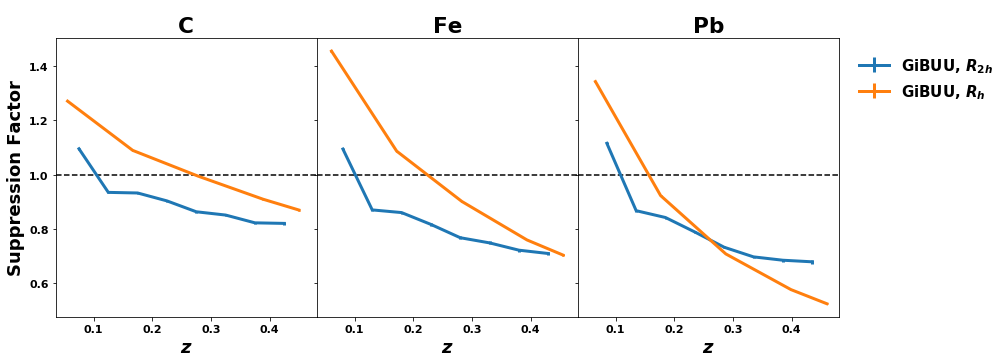

In [25]:
x_data_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45])
y_data_singleHadron = {}
erry_data_singleHadron  ={}

y_data_singleHadron['pip_C'] = np.array([1.14377 , 0.991528 , 0.902358 , 0.853406 , 0.837642 ])
erry_data_singleHadron['pip_C'] = np.array([0.00311613 , 0.00157512 , 0.001843 , 0.00229271 , 0.00291008 ])
y_data_singleHadron['pip_Fe'] = np.array([1.16785 , 0.914393 , 0.758705 , 0.683655 , 0.642149 ])
erry_data_singleHadron['pip_Fe'] = np.array([0.00285128 , 0.00131102 , 0.00141581 , 0.00169536 , 0.00206393  ])
y_data_singleHadron['pip_Pb'] = np.array([0.958606 , 0.719983 , 0.57628 , 0.503447 , 0.464043  ])
erry_data_singleHadron['pip_Pb'] = np.array([0.00273899 , 0.00124261 , 0.00132827 , 0.00159042 , 0.00194019 ])

x_data_pim_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75])

y_data_singleHadron['pim_C'] = np.array([ 1.14172 , 0.992301 , 0.904382 , 0.858762 , 0.814561 ])
erry_data_singleHadron['pim_C'] = np.array([0.0054489 , 0.00266114 , 0.00303142 , 0.00430438 , 0.00651458  ])
y_data_singleHadron['pim_Fe'] = np.array([1.18926 , 0.949964 , 0.802236 , 0.717104 , 0.656101 ])
erry_data_singleHadron['pim_Fe'] = np.array([0.00532453 , 0.00237637 , 0.00250118 , 0.00334693 , 0.00490003  ])
y_data_singleHadron['pim_Pb'] = np.array([1.07461 , 0.826597 , 0.668954 , 0.571658 , 0.511301 ]) 
erry_data_singleHadron['pim_Pb'] = np.array([0.00523426 , 0.00230227 , 0.00241594 , 0.00321067 , 0.00467534  ])


y_GiBUU_singleHadron = {}
erry_GiBUU_singleHadron  ={}
x_GiBUU_singleHadron = np.array([0.05555556 ,0.16666667 ,0.27777778 ,0.38888889, 0.45  ])


y_GiBUU_singleHadron['pip_C']=np.array([1.2706959,  1.08947724, 0.99504182, 0.90983822, 0.87008815])
y_GiBUU_singleHadron['pip_Fe']=np.array([1.45474057, 1.08676467, 0.90162779, 0.75997446, 0.70464241])
y_GiBUU_singleHadron['pip_Pb']=np.array([1.34267664, 0.92325242 ,0.70871029, 0.57738503, 0.52548756])
y_GiBUU_singleHadron['pim_C']=np.array([1.15775933 ,1.00102127, 0.96162586, 0.89191957, 0.85893181])
y_GiBUU_singleHadron['pim_Fe']=np.array([1.25795649 ,0.95501298, 0.85133908, 0.73355979, 0.68619796])
y_GiBUU_singleHadron['pim_Pb']=np.array([1.50585669 ,1.00346182, 0.83044466, 0.65311636, 0.58317362])

erry_GiBUU_singleHadron['pip_C']=np.array([0.00178479 ,0.00118499 ,0.00151467, 0.00174534, 0.00196202])
erry_GiBUU_singleHadron['pip_Fe']=np.array([0.00225931, 0.00137018 ,0.0016492 , 0.00181247, 0.00200441])
erry_GiBUU_singleHadron['pip_Pb']=np.array([0.00193688, 0.00109174, 0.0012368,  0.00132385, 0.00144436])
erry_GiBUU_singleHadron['pim_C']=np.array([0.00149382 ,0.00100624, 0.00145127, 0.0018199,  0.00216692])
erry_GiBUU_singleHadron['pim_Fe']=np.array([0.00182938, 0.00113482, 0.00155974, 0.00187395, 0.00219665])
erry_GiBUU_singleHadron['pim_Pb']=np.array([0.00191197, 0.00105352, 0.00136291 ,0.00152573, 0.0017285])

 #totalerror = np.sqrt(np.power(np.array(erry_data['pip_%s'%target]),2) + 
 #                        np.power(np.array(y_data['pip_%s'%target])*sysError,2))

sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pip_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pip_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pip_%s'%target])*sysError,2))


sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pim_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pim_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pim_%s'%target])*sysError,2))

colors=['','#1f77b4','#ff7f0e','#2ca02c']


alpha_value=0.8

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z',
                            pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)


        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=alpha_value-0.5, 
        #                    color=colors[1])  

        
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_z>0.5')
    if True:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8,label='GiBUU, $R_{2h}$'if i == 0 else "",color=colors[1],
                        lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU cond.',alpha=alpha_value,lw=5)
    #else:
    #    axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8, color=colors[1],lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
count=0    
for i,target in enumerate(['C','Fe','Pb']):  
    if True:
        #axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pim_%s'%target],
        #                yerr=erry_data_singleHadron['pim_%s'%target],label='Inc. $\pi^{-}$'if i == 0 else "",
        #                fmt='--o',ms=8, color=colors[2], alpha=alpha_value,lw=2)
        #axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pim_%s'%target],
        #                yerr=erry_GiBUU_singleHadron['pim_%s'%target],label='GiBUU Inc. $\pi^{-}$'if i == 0 else "",
        #                fmt='-',ms=8, color=colors[2],lw=3)

        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pip_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pip_%s'%target],label='GiBUU, $R_{h}$'if i == 0 else "",
                        fmt='-',ms=8, color=colors[2],lw=3)


    count=count+1
        
for i in range(3):    axs[i].set_xlabel('$z$',fontsize=18)
tit=r'Suppression Factor'
axs[0].set_ylabel(tit,fontsize=18,fontweight='bold')
axs[0].set_title('C',fontweight='bold')
axs[1].set_title('Fe',fontweight='bold')
axs[2].set_title('Pb',fontweight='bold')



for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)



#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
#plt.axhline(y=1.0,color='black',linestyle='--')
#plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

#plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
#plt.yticks(fontsize=14)
plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=15, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('ComparisonConditionalInclusiveRatios_noPiminus_tmp.pdf', bbox_inches='tight')
plt.show()




# Get ratio from MC (null expected). 
**Deviations reflect acceptance differences between solid and liquid target**


**Idea: MC has not signal, any modification from unity is due to acceptance effects**

**As a function of $z_{2}$**

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid>0 and h2_pid<0
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid<0 and h2_pid>0


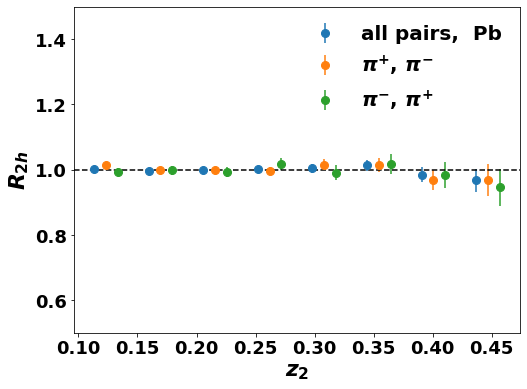

In [26]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['Pb']):
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08,maxz=0.45)
    
    plt.errorbar(x+0.01,r,yerr=err,label='all pairs,  %s'%target,fmt='o',ms=8)
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08,maxz=0.45,    pair_cut='and h1_pid>0 and h2_pid<0')
    plt.errorbar(x+0.02,r,yerr=err,label='$\pi^{+}$, $\pi^{-}$',fmt='o',ms=8)
    
    
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08, maxz=0.45,   pair_cut='and h1_pid<0 and h2_pid>0')
    plt.errorbar(x+0.03,r,yerr=err,label='$\pi^{-}$, $\pi^{+}$',fmt='o',ms=8)
    
plt.ylabel(r'$R_{2h}$',fontsize=22)
plt.xlabel(r'$z_{2}$',fontsize=22)
plt.ylim([0.5,1.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(frameon=False,loc='best')

Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5


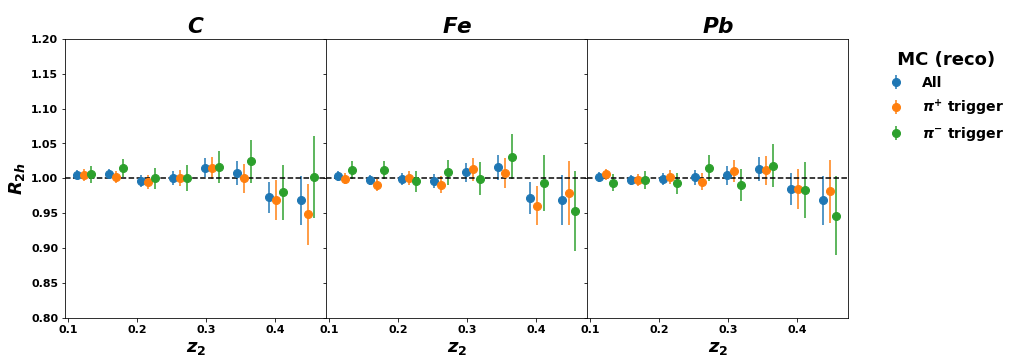

In [27]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})

triCut='h1_z> 0.5'
pairCut_1='and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5'
pairCut_2='and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5'

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08,maxz=0.45, variable='h2_z', trig_cut='%s'%triCut,nbins=9,
                           pair_cut='')
    
    axs[i].errorbar(x+0.01,r,yerr=err,label='All'if i == 0 else "",fmt='o',ms=8)
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08,maxz=0.45,    pair_cut='%s'%pairCut_1, nbins=9,
                            variable='h2_z', trig_cut='%s'%triCut)
    axs[i].errorbar(x+0.02,r,yerr=err,label='$\pi^{+}$ trigger'if i == 0 else "",fmt='o',ms=8)
    
    
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.08, maxz=0.45,   pair_cut='%s'%pairCut_2, nbins=9,
                            variable='h2_z', trig_cut='%s'%triCut)
    axs[i].errorbar(x+0.03,r,yerr=err,label='$\pi^{-}$ trigger'if i == 0 else "",fmt='o',ms=8)
    

for i in range(3):    axs[i].set_xlabel(r'$z_{2}$',fontsize=18)

axs[0].set_ylabel('$R_{2h}$',fontsize=18)
axs[0].set_title('$C$')
axs[1].set_title('$Fe$')
axs[2].set_title('$Pb$')


axs[0].set_ylim([0.8,1.2])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n\n MC (reco)')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('MC_cross_check_z2.pdf', bbox_inches='tight')
plt.show()


**As a function of $\Delta \phi$**

Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and  h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and  h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and  h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.1


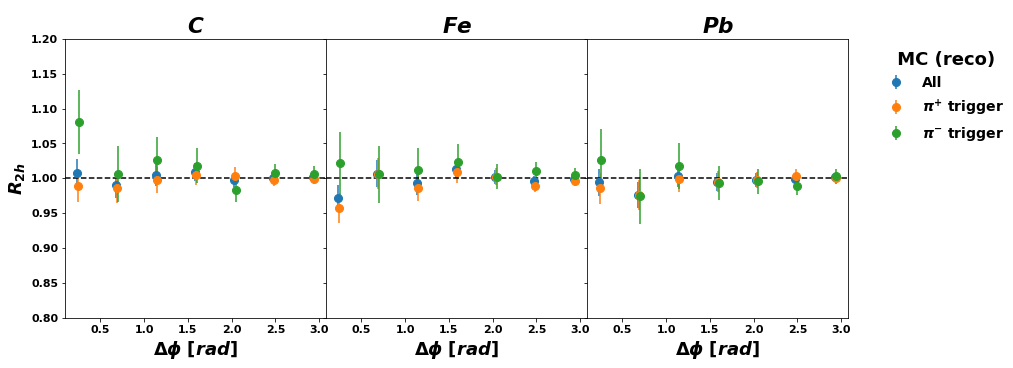

In [28]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})

triCut='h1_z> 0.5'
pairCut_1='and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5'
pairCut_2='and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5'

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.0,maxz=3.14, variable='dphi', trig_cut='%s'%triCut,nbins=8,
                           pair_cut='and  h2_z>0.1')
    
    axs[i].errorbar(x+0.01,r,yerr=err,label='All'if i == 0 else "",fmt='o',ms=8)
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.0,maxz=3.14,    pair_cut='%s and h2_z>0.1'%pairCut_1, nbins=8,
                            variable='dphi', trig_cut='%s'%triCut)
    axs[i].errorbar(x+0.02,r,yerr=err,label='$\pi^{+}$ trigger'if i == 0 else "",fmt='o',ms=8)
    
    
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.0, maxz=3.14,   pair_cut='%s and h2_z>0.1'%pairCut_2, nbins=8,
                            variable='dphi', trig_cut='%s'%triCut)
    axs[i].errorbar(x+0.03,r,yerr=err,label='$\pi^{-}$ trigger'if i == 0 else "",fmt='o',ms=8)
    

for i in range(3):    axs[i].set_xlabel(r'$\Delta \phi$ $[rad]$',fontsize=18)

axs[0].set_ylabel('$R_{2h}$',fontsize=18)
axs[0].set_title('$C$')
axs[1].set_title('$Fe$')
axs[2].set_title('$Pb$')


axs[0].set_ylim([0.8,1.2])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n\n MC (reco)')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('MC_cross_check_dphi.pdf', bbox_inches='tight')
plt.show()




**As a function of pion-par mass**

Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h2_z>0.10
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10
Print Trigger Cut  h1_z> 0.5 
Total Cut  h1_z> 0.5 and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h2_z>0.10
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10
Print Trigger Cut  h1_z> 0.5 
Total Cut  h1_z> 0.5 and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h2_z>0.10
Print Trigger Cut  h1_z> 0.5
Total Cut  h1_z> 0.5and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10
Print Trigger Cut  h1_z> 0.5 
Total Cut  h1_z> 0.5 and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5 and h2_z>0.10


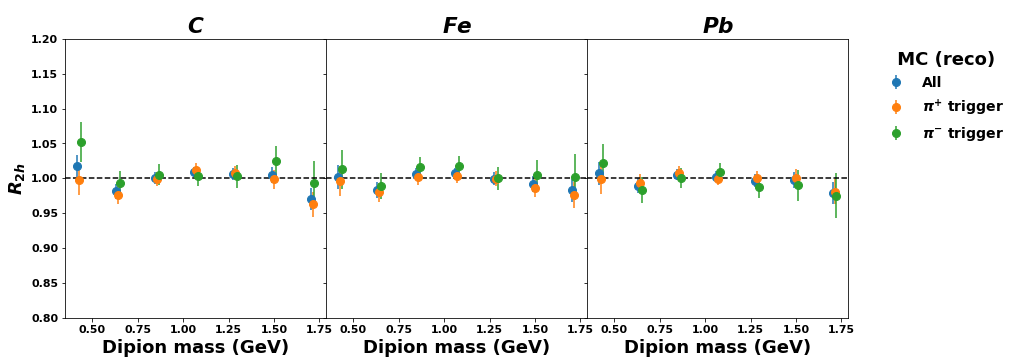

In [29]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})

triCut='h1_z> 0.5'
pairCut_1='and h1_pid==211 and abs(h2_pid)==211 and h1_z> 0.5'
pairCut_2='and h1_pid==-211 and abs(h2_pid)==211 and h1_z> 0.5'

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.3,maxz=1.8, variable='pair_mass', trig_cut='%s'%triCut,nbins=8,
                           pair_cut='and h2_z>0.10')
    
    axs[i].errorbar(x+0.01,r,yerr=err,label='All'if i == 0 else "",fmt='o',ms=8)
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.3,maxz=1.8,    pair_cut='%s and h2_z>0.10'%pairCut_1, nbins=8,
                            variable='pair_mass', trig_cut='%s'%triCut)
    axs[i].errorbar(x+0.02,r,yerr=err,label='$\pi^{+}$ trigger'if i == 0 else "",fmt='o',ms=8)
    
    
    r, err,x = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.3,maxz=1.8,   pair_cut='%s and h2_z>0.10'%pairCut_2, nbins=8,
                            variable='pair_mass', trig_cut='%s '%triCut)
    axs[i].errorbar(x+0.03,r,yerr=err,label='$\pi^{-}$ trigger'if i == 0 else "",fmt='o',ms=8)
    

for i in range(3):    axs[i].set_xlabel('Dipion mass (GeV)',fontsize=18,fontweight='bold')

axs[0].set_ylabel('$R_{2h}$',fontsize=18)
axs[0].set_title('$C$')
axs[1].set_title('$Fe$')
axs[2].set_title('$Pb$')


axs[0].set_ylim([0.8,1.2])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n\n MC (reco)')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('MC_cross_check_dpionMass.pdf', bbox_inches='tight')
plt.show()


# As a function of Pair_pt
pair_pt is a variable, is the transverse momentum of the dipion wrt the virtual photon (the usual pt but this time of the dipion)

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

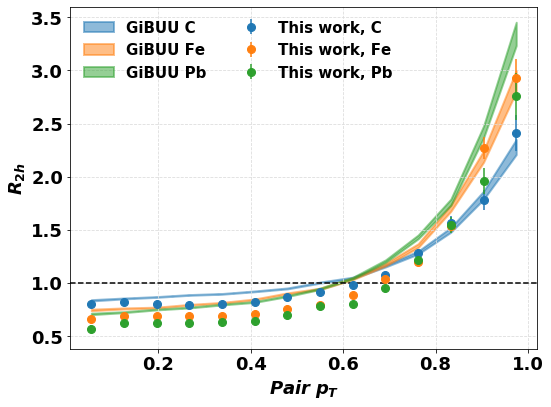

In [30]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], df_trigger['%s_trigger'%target],
                        df_trigger['D_%s_trigger'%target],
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom,                            
                            minz=0.01,maxz=1.0,nbins=15,variable='pair_pt')
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        pair_cut='',minz=0.01,maxz=1.0,nbins=15,variable='pair_pt')    
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,ms=8,lw=2)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1] )

plt.xlabel('$Pair$ $p_{T}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper left',frameon=False,fontsize=15,ncol=2)
plt.tight_layout()
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.savefig('R2h_Pt.pdf')

# With respect to $\Delta \phi$
'dphi' is a variable , is the difference between the PhiPQ of the trigger hadron and the secondary hadron

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

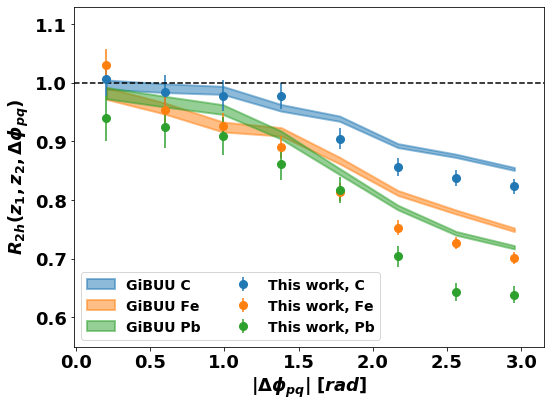

In [31]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14,nbins=9,variable='dphi', 
                            pair_cut = '%s and h2_z>0.1 and h2_z<0.5'%pair_cut_nom,
                            trig_cut = '%s'%trigger_cut_nom )
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
for j,target in enumerate(['C','Fe','Pb']):   
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        minz=0.0,maxz=3.14,nbins=9,variable='dphi', 
                            pair_cut='and h2_z>0.1 and h2_z<0.5',
                           trig_cut='h1_z>0.5')
        
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1])

    
plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

plt.xlim([-0.01,3.155])
plt.ylim([0.55,1.13])
#plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='lower left',frameon=True,fontsize=14,ncol=2)
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
plt.savefig('R2h_DeltaPhi.pdf', bbox_inches='tight')

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 and h2_z<0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 and h2_z<0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 and h2_z<0.5


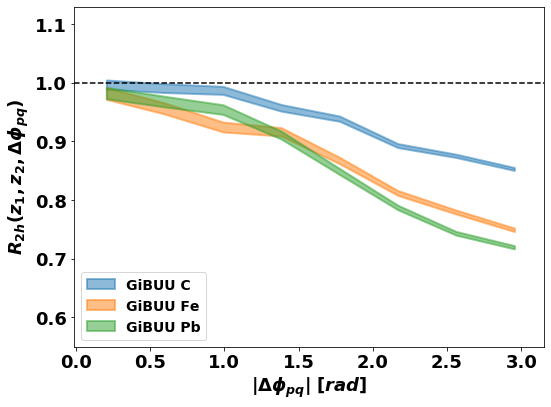

In [32]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):   
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        minz=0.0,maxz=3.14,nbins=9,variable='dphi', 
                            pair_cut='and h2_z>0.1 and h2_z<0.5',
                           trig_cut='h1_z>0.5')
        
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1])

    
plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

plt.xlim([-0.01,3.155])
plt.ylim([0.55,1.13])
#plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='lower left',frameon=True,fontsize=14,ncol=1)
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
plt.savefig('R2h_DeltaPhi_tmp.pdf', bbox_inches='tight')

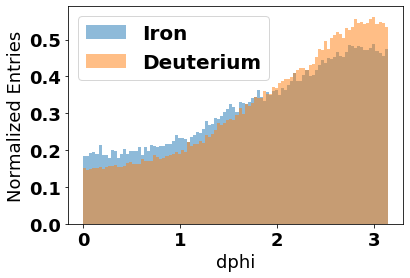

In [33]:
plt.hist(df['Fe']['dphi'],bins=100,alpha=0.5,density=True,label='Iron') # it's normalized due to the density=True!
plt.hist(df['D_Fe']['dphi'],bins=100,alpha=0.5,density=True,label='Deuterium')
plt.xlabel('dphi')
plt.ylabel('Normalized Entries')
plt.legend()
plt.show()

# As a function of the Dipion mass (GeV)
**the variable is called 'pair_mass'**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)

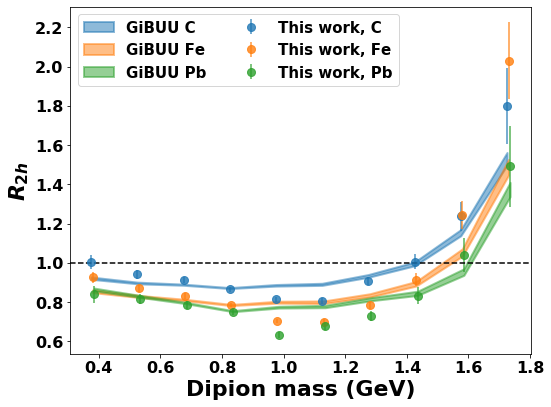

In [34]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], df_trigger['%s_trigger'%target], 
                        df_trigger['D_%s_trigger'%target],variable='pair_mass',
                            minz=0.3,maxz=1.8,nbins=11,
                            pair_cut='%s and h2_z>0.10 '%pair_cut_nom,
                            trig_cut = '%s '%trigger_cut_nom, applyweight=False)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',alpha=0.8,color=colors[i+1])
    #plt.fill_between(x+0.02*i,r*1.04,r*0.96, alpha=0.2,color=colors[target])
    
    ##GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger'],variable='pair_mass',minz=0.3,maxz=1.8,
                        nbins=11,pair_cut='and h2_z>0.10',
                            trig_cut='h1_z>0.5',applyweight=False)
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.5)
    #plt.plot(x+0.005*i,r,color=colors[target],lw=3,alpha=0.8,label='GiBUU %s'%target)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[i+1])

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.legend(frameon=True,ncol=2,loc='upper left',fontsize=15)
plt.xlabel('Dipion mass (GeV)',fontsize=22,fontweight='bold' )
plt.ylabel('$R_{2h}$',fontsize=22)
plt.axhline(y=1.0,color='black',linestyle='--')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')

#plt.text(0.60, 1.1, 'CLAS \nINTERNAL', fontsize=30)
#plt.xscale('log')
#plt.ylim([0.0,1.2])
plt.tight_layout()
#plt.savefig('MainResult_withGiBUU_mass.png')
plt.savefig('DipionMass_comp.pdf', bbox_inches='tight')

Print Trigger Cut  h1_z>0.5 
Total Cut  h1_z>0.5 and h2_z>0.10 
Print Trigger Cut  h1_z>0.5 
Total Cut  h1_z>0.5 and h2_z>0.10 
Print Trigger Cut  h1_z>0.5 
Total Cut  h1_z>0.5 and h2_z>0.10 


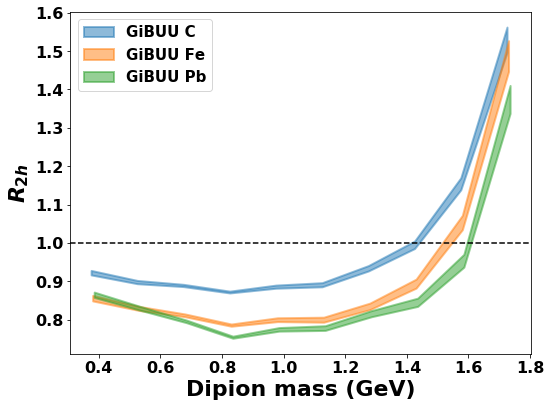

In [35]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):

    ##GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger'],variable='pair_mass',minz=0.3,maxz=1.8,
                        nbins=11,pair_cut='and h2_z>0.10 ',
                            trig_cut='h1_z>0.5 ',applyweight=False)
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.5)
    #plt.plot(x+0.005*i,r,color=colors[target],lw=3,alpha=0.8,label='GiBUU %s'%target)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[i+1])

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.legend(frameon=True,ncol=1,loc='upper left',fontsize=15)
plt.xlabel('Dipion mass (GeV)',fontsize=22,fontweight='bold' )
plt.ylabel('$R_{2h}$',fontsize=22)
plt.axhline(y=1.0,color='black',linestyle='--')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')

#plt.text(0.60, 1.1, 'CLAS \nINTERNAL', fontsize=30)
#plt.xscale('log')
#plt.ylim([0.0,1.2])
plt.tight_layout()
#plt.savefig('MainResult_withGiBUU_mass.png')
plt.savefig('DipionMass_comp_tmp.pdf', bbox_inches='tight')

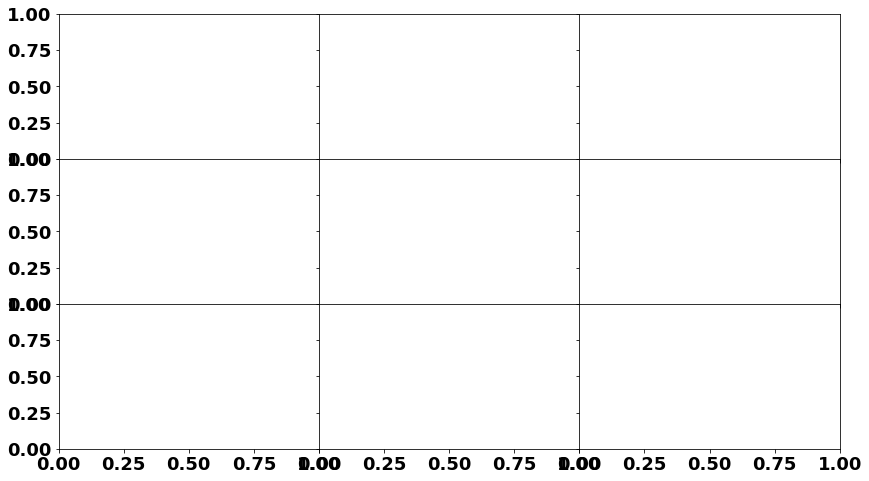

In [36]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(14,8),gridspec_kw={'hspace': 0., 'wspace':0.})


# Comparing all pairs with ($\pi^{+}$$\pi^{-}$) and ($\pi^{-}$$\pi^{+}$) pairs. 
**Format is (trigger/secondary)**

**All pairs and +- and -+ R2h results for the 3 variables**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) a

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1  and h2_z<0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1  and h2_z<0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1  and h2_z<0.5
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-2

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid

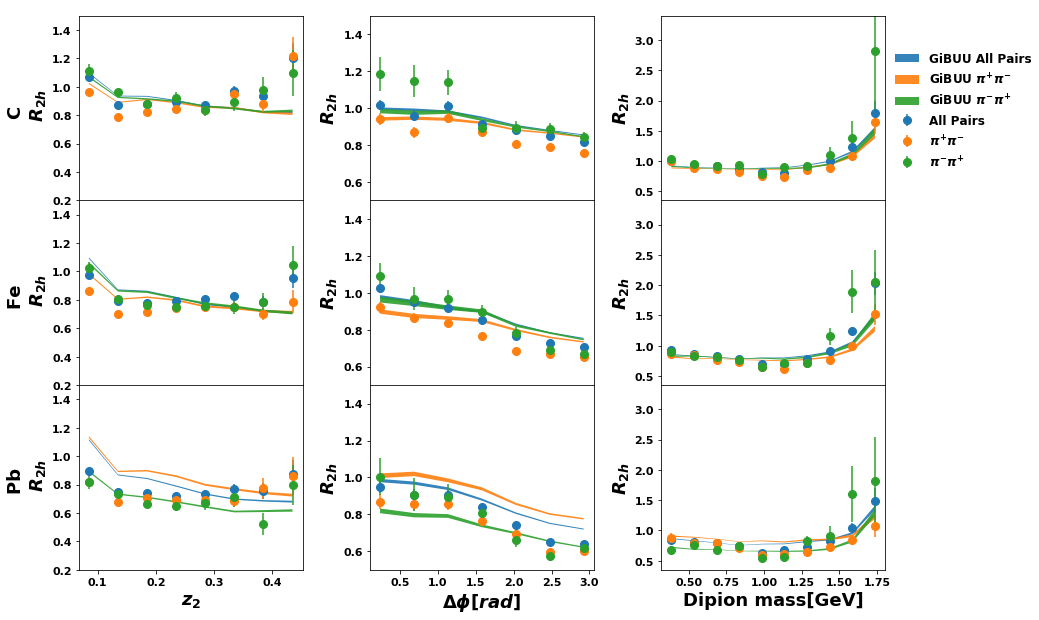

In [37]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,9),gridspec_kw={'hspace': 0., 'wspace':0.3})

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                            pair_cut = pair_cut_nom,
                            trig_cut = trigger_cut_nom)
    axs[i][0].errorbar(x+0.005*i,r,yerr=err,label='All Pairs'if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom )
    axs[i][0].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+}\pi^{-}$'if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[i][0].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-}\pi^{+}$'if i == 0 else "",fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                            pair_cut = '', trig_cut='h1_z>0.5')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5,label='GiBUU All Pairs'if i == 0 else "")
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}\pi^{-}$'if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$'if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                            pair_cut = '%s and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                            trig_cut = trigger_cut_nom, nbins=dphiBins)
    axs[i][1].errorbar(x+0.005*i,r,yerr=err,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom, nbins=dphiBins )
    axs[i][1].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom , nbins=dphiBins)
    axs[i][1].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False, 
                            pair_cut = 'and h2_z>0.1  and h2_z<0.5', trig_cut='h1_z>0.5', nbins=dphiBins)
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)



### Inv Mass
dpionMassBins=11

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                            pair_cut = '%s and h2_z>0.1 '%pair_cut_nom,
                            trig_cut = trigger_cut_nom)
    axs[i][2].errorbar(x+0.005*i,r,yerr=err,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom)
    axs[i][2].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[i][2].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                            pair_cut = 'and h2_z>0.1 ', trig_cut='h1_z>0.5')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
            
axs[2][0].set_xlabel('$z_{2}$',fontsize=18)
axs[2][1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[2][2].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

for i in range(1,3):     
    axs[0][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
    axs[1][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
    axs[2][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')

axs[0][0].set_ylim([0.4,1.5])
for i in range(3):    
    axs[i][1].set_ylim([0.5,1.5])
    axs[i][0].set_ylim([0.2,1.5])
    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(0,3):
    axs[0][i].tick_params(axis='x', which='major', labelsize=0)    
    axs[1][i].tick_params(axis='x', which='major', labelsize=0)    
    
plt.subplots_adjust(right=0.85, top=0.98, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('testingR2hPairs.pdf', bbox_inches='tight')
plt.show()

**Considering only the trigger, i.e trigger pi+ means all pairs in which the pi+ is the trigger**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.1

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h2_z>0.1 
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  a

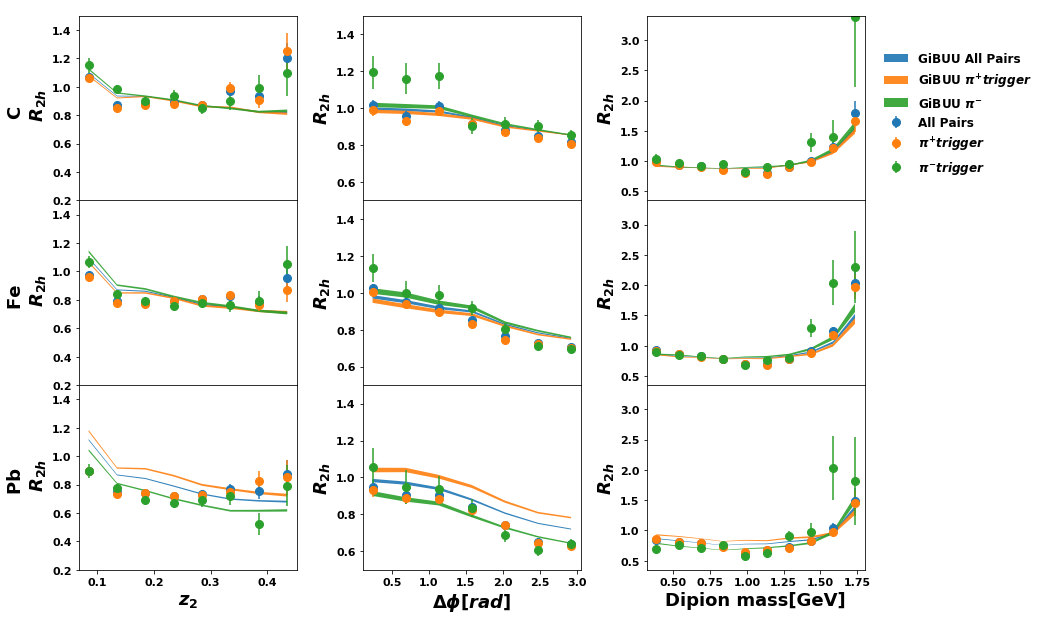

In [38]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,9),gridspec_kw={'hspace': 0., 'wspace':0.3})

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                            pair_cut = pair_cut_nom,
                            trig_cut = trigger_cut_nom)
    axs[i][0].errorbar(x+0.005*i,r,yerr=err,label='All Pairs'if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom )
    axs[i][0].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+} trigger$'if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[i][0].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-} trigger$'if i == 0 else "",fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                            pair_cut = '', trig_cut='h1_z>0.5')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5,label='GiBUU All Pairs'if i == 0 else "")
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+} trigger$'if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}$'if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                            pair_cut = '%s and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                            trig_cut = trigger_cut_nom, nbins=dphiBins)
    axs[i][1].errorbar(x+0.005*i,r,yerr=err,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom, nbins=dphiBins )
    axs[i][1].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom , nbins=dphiBins)
    axs[i][1].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False, 
                            pair_cut = 'and h2_z>0.1  and h2_z<0.5', trig_cut='h1_z>0.5', nbins=dphiBins)
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)



### Inv Mass
dpionMassBins=11

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                            pair_cut = '%s and h2_z>0.1 '%pair_cut_nom,
                            trig_cut = trigger_cut_nom)
    axs[i][2].errorbar(x+0.005*i,r,yerr=err,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom)
    axs[i][2].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[i][2].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                            pair_cut = 'and h2_z>0.1 ', trig_cut='h1_z>0.5')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
            
axs[2][0].set_xlabel('$z_{2}$',fontsize=18)
axs[2][1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[2][2].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

for i in range(1,3):     
    axs[0][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
    axs[1][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
    axs[2][i].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')

axs[0][0].set_ylim([0.4,1.5])
for i in range(3):    
    axs[i][1].set_ylim([0.5,1.5])
    axs[i][0].set_ylim([0.2,1.5])
    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(0,3):
    axs[0][i].tick_params(axis='x', which='major', labelsize=0)    
    axs[1][i].tick_params(axis='x', which='major', labelsize=0)    
    
plt.subplots_adjust(right=0.83, top=0.98, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('testingR2hPairs_onlyConsideringTriggers.pdf', bbox_inches='tight')
plt.show()

**Same as before but this time with a change in the format**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

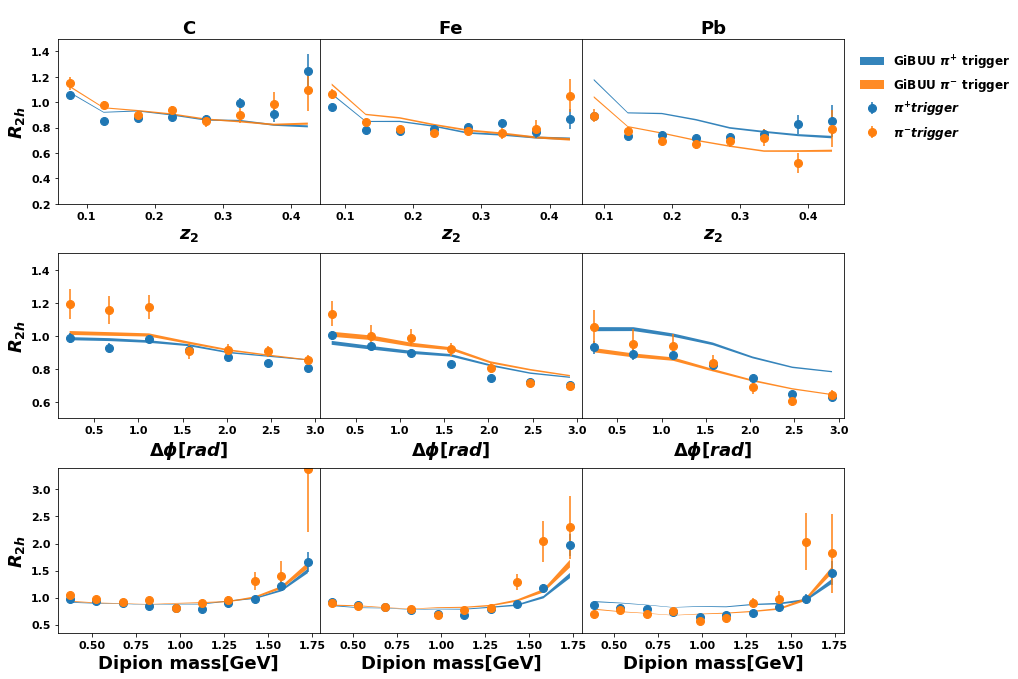

In [39]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,10),gridspec_kw={'hspace': 0.3, 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom )
    axs[0][i].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+} trigger$'if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[0][i].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-} trigger$'if i == 0 else "",fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}$ trigger'if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}$ trigger'if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom , nbins=dphiBins)
    axs[1][i].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)



### Inv Mass
dpionMassBins=11


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    axs[2][i].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
            
for i in range(3):    
    axs[0][i].set_xlabel('$z_{2}$',fontsize=18)
    axs[1][i].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
    axs[2][i].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

    
axs[0][0].set_title('C',fontsize=18,fontweight='bold')
axs[0][1].set_title('Fe',fontsize=18,fontweight='bold')
axs[0][2].set_title('Pb',fontsize=18,fontweight='bold')
#axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

    
axs[0][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
for i in range(3): 
    axs[0][i].set_ylim([0.2,1.5])
    axs[1][i].set_ylim([0.5,1.5])
    axs[2][i].set_ylim([0.35,3.4])

#for i in range(3):    
#    axs[i][1].set_ylim([0.5,1.5])
#    axs[i][0].set_ylim([0.2,1.5])
#    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(1,3):
    axs[0][i].yaxis.set_visible(False)    
    axs[1][i].yaxis.set_visible(False)    
    axs[2][i].yaxis.set_visible(False)      

plt.subplots_adjust(right=0.83, top=0.95, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_onlyConsideringTriggers_newFormat.pdf', bbox_inches='tight')
plt.show()

Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Tri

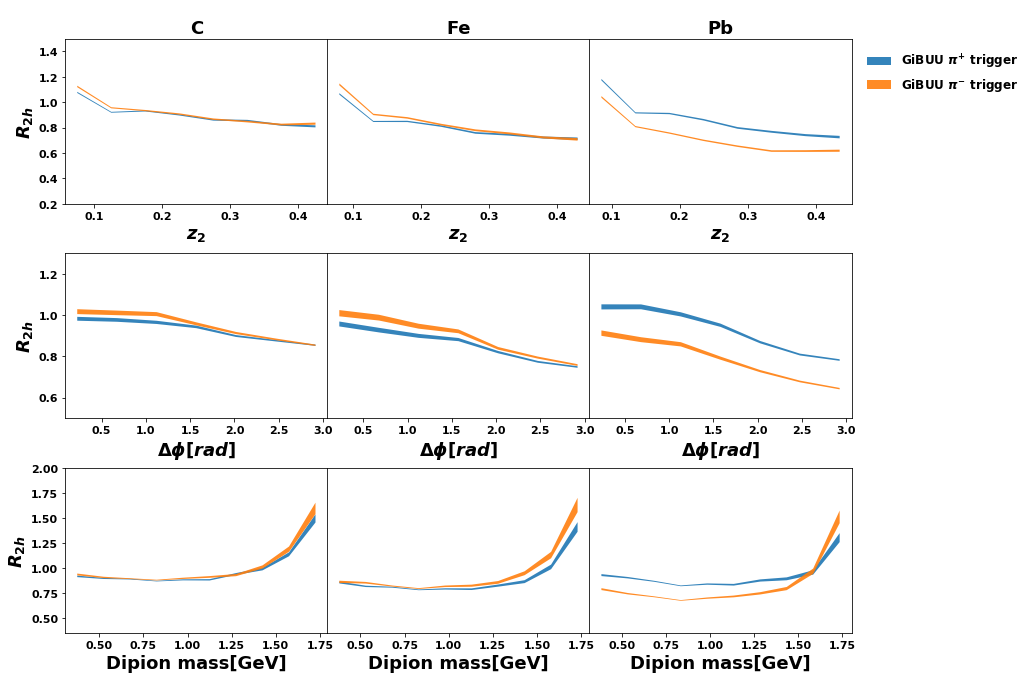

In [40]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,10),gridspec_kw={'hspace': 0.3, 'wspace':0.})




 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}$ trigger'if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}$ trigger'if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8



 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)



### Inv Mass
dpionMassBins=11


   

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
            
for i in range(3):    
    axs[0][i].set_xlabel('$z_{2}$',fontsize=18)
    axs[1][i].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
    axs[2][i].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

    
axs[0][0].set_title('C',fontsize=18,fontweight='bold')
axs[0][1].set_title('Fe',fontsize=18,fontweight='bold')
axs[0][2].set_title('Pb',fontsize=18,fontweight='bold')
#axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

    
axs[0][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
for i in range(3): 
    axs[0][i].set_ylim([0.2,1.5])
    axs[1][i].set_ylim([0.5,1.3])
    axs[2][i].set_ylim([0.35,2.0])

#for i in range(3):    
#    axs[i][1].set_ylim([0.5,1.5])
#    axs[i][0].set_ylim([0.2,1.5])
#    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(1,3):
    axs[0][i].yaxis.set_visible(False)    
    axs[1][i].yaxis.set_visible(False)    
    axs[2][i].yaxis.set_visible(False)      

plt.subplots_adjust(right=0.83, top=0.95, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_onlyConsideringTriggers_newFormat_tmp.pdf', bbox_inches='tight')
plt.show()

**Ratios +-/-+**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211


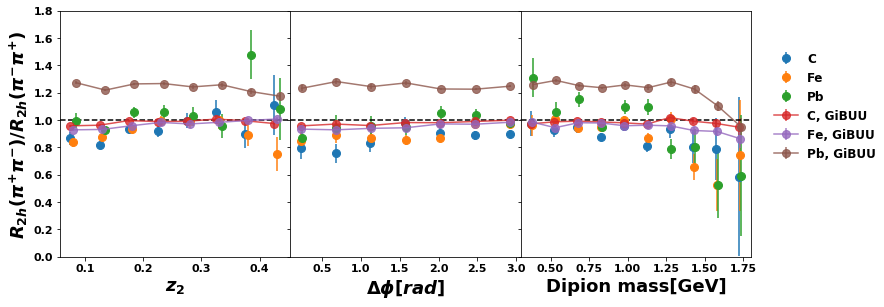

In [41]:
fig, axs = plt.subplots(1, 3,sharex=False, sharey=True,figsize=(12,4),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom )
    #axs[i][0].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+}\pi^{-}$'if i == 0 else "",fmt='o',ms=8) 
    
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    #axs[i][0].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-}\pi^{+}$'if i == 0 else "",fmt='o',ms=8) 
    
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[0].errorbar(x3+0.005*i,y,yerr=dy,label='%s'%target,fmt='o',ms=8)
    
    
    

 #GiBUU    
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}\pi^{-}$'if i == 0 else "",alpha=0.9,lw=5)
    
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    #axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$'if i == 0 else "",alpha=0.9,lw=5)

    
    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    axs[0].errorbar(x2+0.005*i,y,yerr=dy,label='%s, GiBUU'%target,fmt='o-',ms=8, alpha=0.8)
    
    #axs[0][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$'if i == 0 else "",alpha=0.9,lw=5)
        
    
    
### Dphi
dphiBins=8

    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom, nbins=dphiBins )
    #axs[i][1].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom , nbins=dphiBins)
    #xs[i][1].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[1].errorbar(x3+0.005*i,y,yerr=dy,fmt='o',ms=8)
    
        

 #GiBUU    

    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    #axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    axs[1].errorbar(x2+0.005*i,y,yerr=dy,fmt='o-',ms=8, alpha=0.8)
    
        

### Inv Mass
dpionMassBins=11

    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and h1_pid==211 and h2_pid==-211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom)
    #axs[i][2].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    #axs[i][2].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[2].errorbar(x2+0.005*i,y,yerr=dy,fmt='o',ms=8)
    
            

 #GiBUU    

    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and h2_pid==-211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and h2_pid==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    #axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    axs[2].errorbar(x2+0.005*i,y,yerr=dy,fmt='o-',ms=8, alpha=0.8)
        
            
axs[0].set_xlabel('$z_{2}$',fontsize=18)
axs[1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[2].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

axs[0].set_ylabel('$R_{2h}(\pi^{+}\pi^{-}) / R_{2h}(\pi^{-}\pi^{+})$',fontsize=18,fontweight='bold')


axs[0].set_ylim([0.0,1.8])

#axs[0].set_xlim([0.00,0.5])

  
for i in range(3):    axs[i].axhline(y=1.0,color='black',linestyle='--')

    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
axs[0].tick_params(axis='both', which='major', labelsize=11)    
axs[1].tick_params(axis='both', which='major', labelsize=11)
axs[2].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.98, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_ratio.pdf', bbox_inches='tight')
plt.show()

**Considering only the trigger, i.e trigger pi+ means all pairs in which the pi+ is the trigger**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211


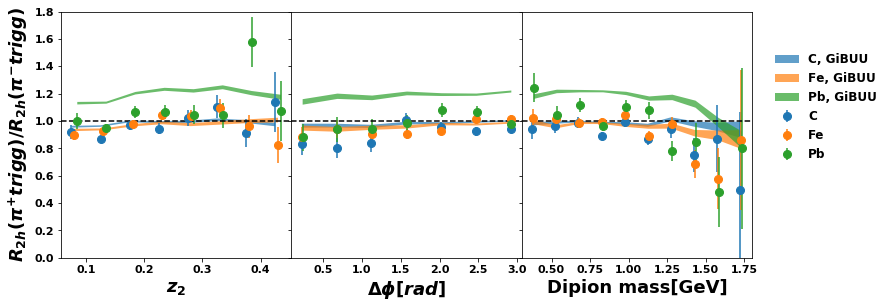

In [42]:
fig, axs = plt.subplots(1, 3,sharex=False, sharey=True,figsize=(12,4),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom )
    #axs[i][0].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+}\pi^{-}$'if i == 0 else "",fmt='o',ms=8) 
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    #axs[i][0].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-}\pi^{+}$'if i == 0 else "",fmt='o',ms=8) 
    
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[0].errorbar(x3+0.005*i,y,yerr=dy,label='%s'%target,fmt='o',ms=8)

 #GiBUU    
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}\pi^{-}$'if i == 0 else "",alpha=0.9,lw=5)
    
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    #axs[i][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$'if i == 0 else "",alpha=0.9,lw=5)

    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    #axs[0].errorbar(x2+0.005*i,y,yerr=dy,label='%s, GiBUU'%target,fmt='o-',ms=8, alpha=0.8)
    axs[0].fill_between(x2+0.005*i,y-dy,y+dy,alpha=0.7,lw=5,label='%s, GiBUU'%target)
    #axs[0][0].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$'if i == 0 else "",alpha=0.9,lw=5)

### Dphi
dphiBins=8

    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom, nbins=dphiBins )
    #axs[i][1].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom , nbins=dphiBins)
    #xs[i][1].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[1].errorbar(x3+0.005*i,y,yerr=dy,fmt='o',ms=8)

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    #axs[i][1].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    axs[1].fill_between(x2+0.005*i,y-dy,y+dy,alpha=0.7,lw=5)
    #axs[1].errorbar(x2+0.005*i,y,yerr=dy,fmt='o-',ms=8, alpha=0.8)

### Inv Mass
dpionMassBins=11

    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==211'%trigger_cut_nom)
    #axs[i][2].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = '%s and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and h1_pid==-211'%trigger_cut_nom )
    #axs[i][2].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8) 
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[2].errorbar(x2+0.005*i,y,yerr=dy,fmt='o',ms=8)

 #GiBUU    

    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==211')
    #axs[i][2].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
    r2, err2,x2 = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and h2_z>0.1  and h2_z<0.5 and h1_pid==-211 and abs(h2_pid)==211', 
                            trig_cut='h1_z>0.5 and h1_pid==-211')
    y=r/r2
    dy=r/r2*np.hypot(err/r, err2,r2)
    axs[2].fill_between(x2+0.005*i,y-dy,y+dy,alpha=0.7,lw=5)
    #axs[2].errorbar(x2+0.005*i,y,yerr=dy,fmt='-',ms=8, alpha=0.8)
        
            
axs[0].set_xlabel('$z_{2}$',fontsize=18)
axs[1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[2].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

axs[0].set_ylabel('$R_{2h}(\pi^{+} trigg) / R_{2h}(\pi^{-} trigg)$',fontsize=18,fontweight='bold')
axs[0].set_ylim([0.0,1.8])

#axs[0].set_xlim([0.00,0.5])

for i in range(3):    axs[i].axhline(y=1.0,color='black',linestyle='--')

    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
axs[0].tick_params(axis='both', which='major', labelsize=11)    
axs[1].tick_params(axis='both', which='major', labelsize=11)
axs[2].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.98, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_ratio_onlyConsideringTriggers.pdf', bbox_inches='tight')
plt.show()

**Making the ratio of R2h for charged triggers, for MC (reconstruction)**

Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==-211
Total Cut  h1_z>0.5 and h1_pid==-211and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211
Print Trigger Cut  h1_z>0.5 and h1_pid==211
Total Cut  h1_z>0.5 and h1_pid==211 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5
Print Trigger Cut   h1_z>0.5 and h1_pid==-211
Total Cut  

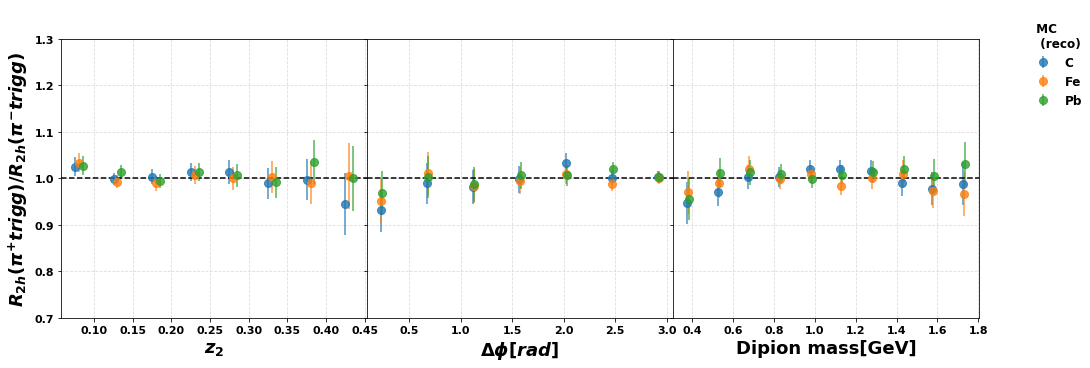

In [43]:
fig, axs = plt.subplots(1, 3,sharex=False, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut =' and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211',
                               trig_cut ='h1_z>0.5 and h1_pid==211' )

    
    r3, err3,x3 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = 'and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211',
                               trig_cut = 'h1_z>0.5 and h1_pid==-211' )
    
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[0].errorbar(x3+0.005*i,y,yerr=dy,label='%s'%target,fmt='o',ms=8, alpha=0.8)
    
### Dphi
dphiBins=8
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut =' and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5',
                               trig_cut ='h1_z>0.5 and h1_pid==211', nbins=dphiBins )
    
    r3, err3,x3 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut = 'and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5',
                               trig_cut =' h1_z>0.5 and h1_pid==-211' , nbins=dphiBins)
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[1].errorbar(x3+0.005*i,y,yerr=dy,fmt='o',ms=8, alpha=0.8)
    
### Inv Mass
dpionMassBins=11
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut =' and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211 and h2_z>0.1 ',
                               trig_cut ='h1_z>0.5 and h1_pid==211')
    
    r3, err3,x3 = r2h.getRatio(df_mc['%s'%target], df_mc['D'], 
                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass', 
                               pair_cut = 'and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211 and h2_z>0.1 ',
                               trig_cut ='h1_z>0.5 and h1_pid==-211' )
    y=r2/r3
    dy=r2/r3*np.hypot(err2/r2, err3,r3)
    axs[2].errorbar(x2+0.005*i,y,yerr=dy,fmt='o',ms=8, alpha=0.8)
        
axs[0].set_xlabel('$z_{2}$',fontsize=18)
axs[1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[2].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

axs[0].set_ylabel('$R_{2h}(\pi^{+} trigg) / R_{2h}(\pi^{-} trigg)$',fontsize=18,fontweight='bold')


axs[0].set_ylim([0.7,1.3])
for i in range(3):
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')

for i in range(3):    axs[i].axhline(y=1.0,color='black',linestyle='--')

    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
axs[0].tick_params(axis='both', which='major', labelsize=11)    
axs[1].tick_params(axis='both', which='major', labelsize=11)
axs[2].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.90, top=0.9, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='  \n MC \n  (reco)', title_fontsize=12)
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_ratio_onlyConsideringTriggers_MC.pdf', bbox_inches='tight')
plt.show()

In [44]:
print(df_trigger.keys())
print(df_trigger['C_trigger'])
#print(df_trigger['GiBUU_D_trigger'])
#df_trigger['GiBUU_Pb_trigger'].query('h1_pid==211').hist(figsize=(10,5),bins=100,column=[ 'h1_pid','h1_z'])
#df_trigger['GiBUU_Pb_trigger'].query('h1_pid==-211').hist(figsize=(10,5),bins=100,column=[ 'h1_pid','h1_z'])
#df_trigger['GiBUU_Pb_trigger'].query('h1_pid==+211').hist(bins=100,column=[ 'h1_pid','h1_z'])

#plt.show()
#nbins=100


#plt.show()

dict_keys(['C_trigger', 'D_C_trigger', 'Fe_trigger', 'D_Fe_trigger', 'Pb_trigger', 'D_Pb_trigger', 'GiBUU_D_trigger', 'GiBUU_C_trigger', 'GiBUU_Fe_trigger', 'GiBUU_Pb_trigger'])
        h1_pid     h1_xf  h1_xf_default      h1_z  h1_cm_pt    h1_rap  \
0          211  0.268135             -1  0.462276  0.561521  0.572662   
1          211  0.132588             -1  0.459470  0.596546  0.233407   
2          211  0.590588             -1  0.760310  0.348340  1.329085   
3          211  0.225028             -1  0.581477  0.679395  0.337916   
4          211  0.144805             -1  0.481131  0.853822  0.222166   
...        ...       ...            ...       ...       ...       ...   
652685     211  0.215953             -1  0.487039  0.753895  0.370413   
652686     211  0.183797             -1  0.432880  0.459185  0.389356   
652687     211  0.361790             -1  0.433600  0.093857  1.721779   
652688     211  0.439695             -1  0.617135  0.394433  0.999965   
652689     211  0.3

**making the ratio between ($\pi^{+}\pi^{-}$)  and  ($\pi^{-}\pi^{+}$).**
**Also, MC case added**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

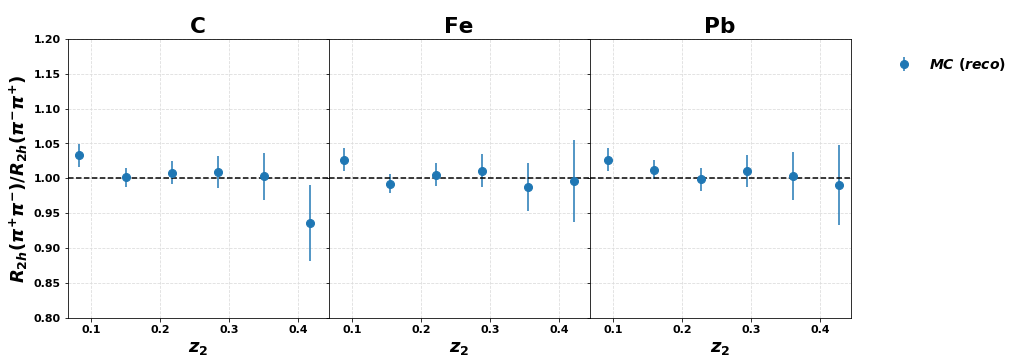

In [45]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})
ratio={}
ratio_err={}
x_coor={}
BINS=7
##Data
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==211 and h2_pid==-211'%pair_cut_nom,
                               trig_cut='%s and h1_pid==211'%trigger_cut_nom , nbins=BINS)
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211'%pair_cut_nom,nbins=BINS,
                              trig_cut='%s and h1_pid==-211'%trigger_cut_nom  )
    ratio['%s_data'%target] = r2/r3
    x_coor['%s_data'%target]   =x2 
    ratio_err['%s_data'%target] = (r2/r3)*   np.sqrt( np.power( (err2/r2),2.0) + np.power((err3/r3) ,2.0)   ) 
    
    
    
##GiBUU    
#for i,target in enumerate(['C','Fe','Pb']):    
#    r, err,x = getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
#                        df_trigger['GiBUU_D_trigger']
#                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, pair_cut = '')
#    if i==0:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5,label='GiBUU All Pairs')
#    else:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
for i,target in enumerate(['C','Fe','Pb']):    
    r2_GiBUU, err2_GiBUU,x2_GiBUU = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                                             df_trigger['GiBUU_%s_trigger'%target], df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211',nbins=BINS,
                                                trig_cut='h1_z>0.5 and  h1_pid==211')
    r3_GiBUU, err3_GiBUU,x3_GiBUU = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                                             df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211',nbins=BINS,
                                                 trig_cut='h1_z>0.5 and  h1_pid==-211'        )
    ratio['%s_GiBUU'%target] = r2_GiBUU/r3_GiBUU
    ratio_err['%s_GiBUU'%target] = (r2_GiBUU/r3_GiBUU)*   np.sqrt( np.power( (err2_GiBUU/r2_GiBUU),2.0) + 
                                                                  np.power((err3_GiBUU/r3_GiBUU) ,2.0)   )
## MC
for i,target in enumerate(['C','Fe','Pb']):    
    r2_mc, err2_mc,x2_mc = r2h.getRatio(df_mc['%s'%target],df_mc['D'],
                                             df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211',nbins=BINS,
                                      trig_cut='h1_z>0.5 and  h1_pid==211' )    
    r3_mc, err3_mc,x3_mc = r2h.getRatio(df_mc['%s'%target],df_mc['D'],
                                             df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211',nbins=BINS,
                                       trig_cut='h1_z>0.5 and  h1_pid==-211')     
    ratio['%s_mc'%target] = r2_mc/r3_mc
    ratio_err['%s_mc'%target] = (r2_mc/r3_mc)*   np.sqrt( np.power( (err2_mc/r2_mc),2.0) + 
                                                                  np.power((err3_mc/r3_mc) ,2.0)   )    
    
    
alpha_value=0.5
        
    
for i,target in enumerate(['C','Fe','Pb']): 
    #if True:    
    #    axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target],
    #                            yerr=ratio_err['%s_data'%target],label='$Data$'if i == 0 else "",fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target]-ratio_err['%s_data'%target],
        #                    ratio['%s_data'%target]+ratio_err['%s_data'%target],alpha=alpha_value,lw=5)

    #if True:    
    #    axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target],
    #                            yerr=ratio_err['%s_GiBUU'%target],
    #                            label='$GiBUU$ \n$(model$ $only)$'if i == 0 else "",fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target]-ratio_err['%s_GiBUU'%target],
        #                    ratio['%s_GiBUU'%target]+ratio_err['%s_GiBUU'%target],alpha=alpha_value,
        #                    lw=5,label='$GiBUU$ \n$(model$ $only)$',)

    if True:    
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target],
                                yerr=ratio_err['%s_mc'%target],
                                label='$MC$ $(reco)$'if i == 0 else "",fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target]-ratio_err['%s_mc'%target],
        #                    ratio['%s_mc'%target]+ratio_err['%s_mc'%target],alpha=alpha_value,lw=5, 
        #                    label='$MC$ $(reco)$')

for i in range(3):    axs[i].set_xlabel('$z_{2}$',fontsize=18)

axs[0].set_ylabel('$R_{2h} (\pi^{+}\pi^{-}) / R_{2h} (\pi^{-}\pi^{+})$',fontsize=18)
axs[0].set_title('C', fontweight='bold')
axs[1].set_title('Fe', fontweight='bold')
axs[2].set_title('Pb', fontweight='bold')


axs[0].set_ylim([0.8,1.2])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('ComparisonGiBUUMC_chargedSeparatedPairs_z2.pdf', bbox_inches='tight')
plt.show()

**making the ratio between ($\pi^{+}\pi^{-}$)  and  ($\pi^{-}\pi^{+}$). Just data**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -1 ))   and h1_pid==-211
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2.700000*2.700000) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-

Text(0, 0.5, '$R_{2h} (\\pi^{+}\\pi^{-}) / R_{2h} (\\pi^{-}\\pi^{+})$')

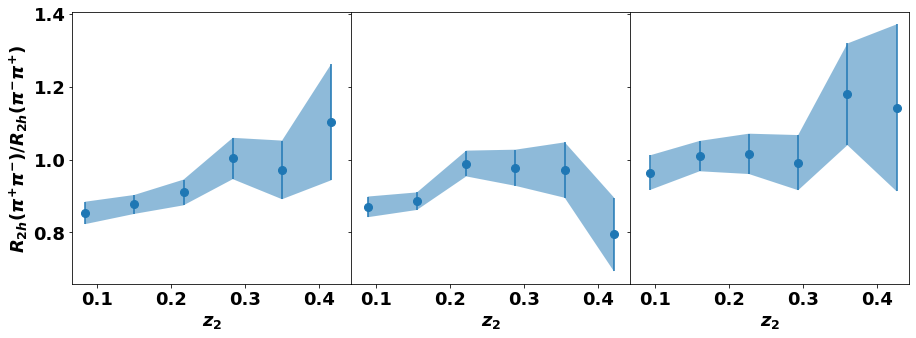

In [46]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})
ratio={}
ratio_err={}
x_coor={}
BINS=7
##Data
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==211 and h2_pid==-211'%pair_cut_nom,
                               trig_cut='%s and h1_pid==211'%trigger_cut_nom , nbins=BINS)
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and h1_pid==-211 and h2_pid==211'%pair_cut_nom,nbins=BINS,
                              trig_cut='%s and h1_pid==-211'%trigger_cut_nom  )
    ratio['%s_data'%target] = r2/r3
    x_coor['%s_data'%target]   =x2 
    ratio_err['%s_data'%target] = (r2/r3)*   np.sqrt( np.power( (err2/r2),2.0) + np.power((err3/r3) ,2.0)   ) 
    
alpha_value=0.5
        
    
for i,target in enumerate(['C','Fe','Pb']): 
    if i==0:    
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target],
                                yerr=ratio_err['%s_data'%target],label='$Data$',fmt='o',ms=8)
        axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target]-ratio_err['%s_data'%target],
                            ratio['%s_data'%target]+ratio_err['%s_data'%target],alpha=alpha_value,lw=5)
       
    else:      
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target],
                               yerr=ratio_err['%s_data'%target],fmt='o',ms=8)
        axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target]-ratio_err['%s_data'%target],
                            ratio['%s_data'%target]+ratio_err['%s_data'%target],alpha=alpha_value,lw=5)
     
        
for i in range(3):    axs[i].set_xlabel('$z_{2}$',fontsize=18)

axs[0].set_ylabel('$R_{2h} (\pi^{+}\pi^{-}) / R_{2h} (\pi^{-}\pi^{+})$',fontsize=18)    

# Data/MC comparison distributions

There are  57  in total for  C


KeyError: 'h1_Sector'

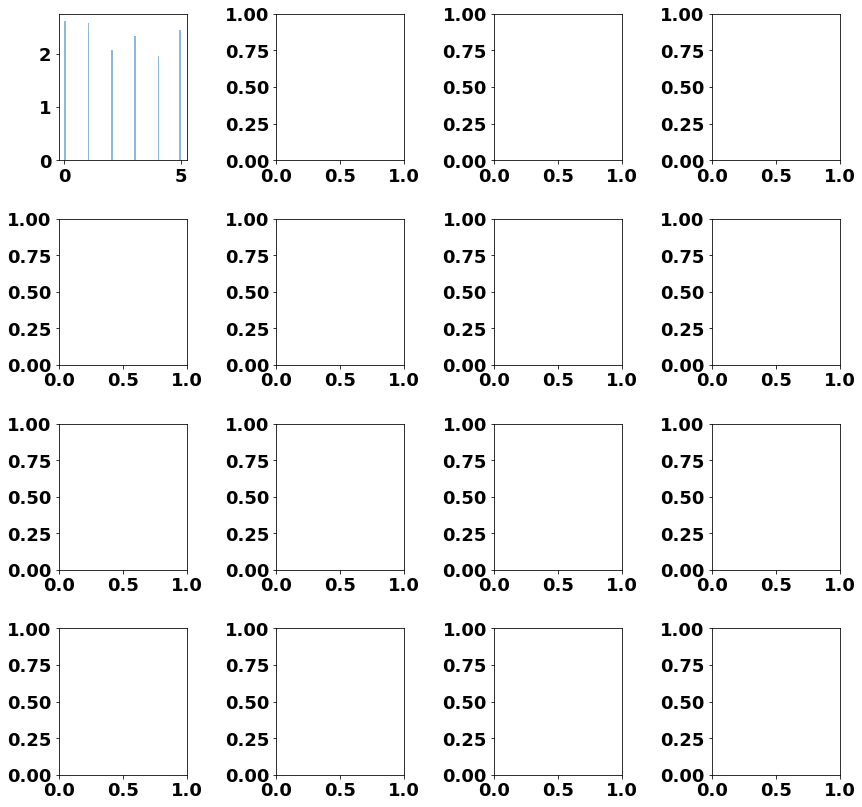

In [47]:
vars=[]
n_row=4
n_col=4
tar='C'
tar_mc='Fe'
nbins=70
vars=df[tar].keys()
vars = vars[-16:] ## we select the last 16 variables to plot, from Q2 down below
print ('There are ', len(df['Fe'].columns), ' in total for ', tar)
fig, axs = plt.subplots(n_row, n_col,sharex=False, sharey=False,figsize=(14,14),
                        gridspec_kw={'hspace': 0.4, 'wspace':0.7})
for j in range(n_row):
    for i in range(n_col):
        axs[j,i].hist(df[tar][vars[i+n_col*j]],bins=nbins,alpha=0.5,density=True,
                      label=' Data'if i+j == 0 else "")
        axs[j,i].hist(df_mc[tar_mc][vars[i+n_col*j]],bins=nbins,alpha=0.5,density=True,
                      label='  MC\n(reco)'if i+j == 0 else "")
        axs[j,i].set_xlabel(vars[i+n_col*j],fontsize=13)
        axs[j,i].set_ylabel('Entries',fontsize=13)
        axs[j,i].tick_params(axis='y', which='major', labelsize=8)
        axs[j,i].tick_params(axis='x', which='major', labelsize=8)
axs[3,3].set_xlim(-0.1,2.2)
plt.subplots_adjust(right=0.9, top=1)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=13, title='\n')
plt.savefig('data_MC_comparison_%s.pdf'%tar, bbox_inches='tight')

In [ ]:
tar='D_Fe'
tar_mc='D'
vars=df[tar].keys()
print(vars[-16:])
print(vars)

# Mix Events

**data**

In [ ]:
%%time
df_mix = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mix[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), '%s_mix'%target)
    df_mix['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s_mix'%target)  


**Aplying the cuts to mix events**

In [ ]:
%%time
for key in df_mix.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df_mix[key] = r2h.applyCuts(df_mix[key],isMC=isMC)
    df_mix[key] = r2h.applyCutsPair(df_mix[key],isMC=isMC)

In [ ]:
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')

In [ ]:
print( 'There are ', len(df_mix['Fe'].keys()) , 'variables in mix_tuple')
print(df_mix['C'].keys())

#df_mix['Pb'].hist(figsize=(20,20),bins=100)
#plt.show()


**MC**

In [ ]:
%%time
df_mc_mix = {}
path_mc="/home/seba/CreatePairTuples"

for target in ['C','D', 'Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mc_mix[target]=getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), '%s_mix'%target)
 

In [ ]:
plt.hist(df['Fe']['h1_p'],bins=100,alpha=0.5,density=True,label='Deuterium')
plt.hist(df_mc['Fe']['h1_p'],bins=100,alpha=0.5,density=True,label='Iron') 

plt.yscale('log')
#plt.xlim(100,125)
plt.xlabel('dphi')
plt.ylabel('Normalized Entries')
#plt.legend()
plt.show()

In [ ]:
%%time
for key in df_mc_mix.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print (key)
    df_mc_mix[key] = r2h.applyCuts(df_mc_mix[key],isMC=isMC)
    df_mc_mix[key] = r2h.applyCutsPair(df_mc_mix[key],isMC=isMC)    
    df_mc_mix[key] = r2h.applyCuts(df_mc_mix[key],isMC=isMC)
    df_mc_mix[key] = r2h.applyCutsPair(df_mc_mix[key],isMC=isMC)

**This is normalized by are not by trigger**

In [ ]:
nbins = 30
dys = []
ys = []
for tar in ['C','D_C','Fe','D_Fe','Pb','D_Pb']:
    a=df_mix[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) ## this return the y array of values and the x arrays of bin edges 
    #print(y)
    #print(x)
    #print(x[1] ,' ; ', x[0])
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    #print('denom is ',denom)
    #print(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.ylim(0.,2.0)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_mixedEvents_comp_data.pdf', bbox_inches='tight')

In [ ]:
plt.hist(df_mix['Fe']['dphi'],bins=100,alpha=0.7,density=True, label='mix $\Delta \phi$')
plt.hist(df_mix['Fe']['dphi_lab'],bins=100,alpha=0.5,density=True, label='mix $\Delta \phi_{LAB}$')

#plt.yscale('log')
#plt.xlim(100,125)
plt.xlabel('dphi')
plt.ylabel('Normalized Entries')
plt.legend(fontsize=9)
plt.show()

In [ ]:
## Here are normalized by the bin average height 
for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mc_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211').dphi,bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    y = np.divide(y,denom)
    dy = np.divide(dy,denom)
    plt.errorbar(x,y,dy,color=color,linestyle='',label=a,marker='o')
plt.legend(ncol=2, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi)$")
plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
plt.savefig('dphi_mixedEvents_comp_MC.pdf', bbox_inches='tight')
plt.show()  


**With respect to the lab frame**

In [ ]:
## Here are normalized by the bin average height 
for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mc_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211').dphi_lab,bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    y = np.divide(y,denom)
    dy = np.divide(dy,denom)
    plt.errorbar(x,y,dy,color=color,linestyle='',label=a,marker='o')
plt.legend(ncol=4, loc='upper center' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi_{LAB})$")
plt.ylim(0.6,1.5)
plt.gca().set_xlabel("$\\Delta\\phi_{LAB}$ [rad]")
plt.savefig('dphiLAB_mixedEvents_comp_MC.pdf', bbox_inches='tight')
plt.show()  


In [ ]:
## for data, The D=D_C+D_Fe+D_Pb
deuFrames=[df_mix['D_C'],df_mix['D_Fe'],df_mix['D_Pb']]
df_mix['D']=pd.concat(deuFrames)

for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    y = np.divide(y,denom)
    dy = np.divide(dy,denom)
    plt.errorbar(x,y,dy,color=color,linestyle='',label=a,marker='o')
plt.legend(ncol=2, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi)$")
plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
plt.savefig('dphi_mixedEvents_comp_data.pdf', bbox_inches='tight')
plt.show()  


**With respect to the lab frame**

In [ ]:
## for data, The D=D_C+D_Fe+D_Pb
deuFrames=[df_mix['D_C'],df_mix['D_Fe'],df_mix['D_Pb']]
df_mix['D']=pd.concat(deuFrames)

for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi_lab,bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    y = np.divide(y,denom)
    dy = np.divide(dy,denom)
    plt.errorbar(x,y,dy,color=color,linestyle='',label=a,marker='o')
plt.legend(ncol=4, loc='upper center' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.ylim(0.8,1.3)
plt.gca().set_ylabel("$M(\\Delta\\phi_{LAB})$")
plt.gca().set_xlabel("$\\Delta\\phi_{LAB}$ [rad]")
plt.savefig('dphiLAB_mixedEvents_comp_data.pdf', bbox_inches='tight')
plt.show()  


In [ ]:
#The ratio of mix events

ys = []
dys = []
x2=[]

for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mc_mix[a]
    y,x = np.histogram(abs(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211').dphi),
                       bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+1]/ys[0]
    dy = ys[i+1]/ys[0]*np.hypot(dys[0]/ys[0],dys[i+1]/ys[i+1])
    denom = np.average(y)
    y/=denom
    dy/=denom
    plt.errorbar(x2[0],y,dy,linestyle='',marker='o',label=tar,alpha=0.8)

plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi)_{A}/M(\\Delta\\phi)_{D}$")
plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
plt.axhline(y=1.0,color='black',linestyle='--')
plt.ylim(0.8,1.2)
plt.savefig('dphi_mixedEvents_comp_MC_ratio.pdf', bbox_inches='tight')

plt.show()  


**With respect to the lab frame**

In [ ]:
#The ratio of mix events

ys = []
dys = []
x2=[]

for a,color in zip('D C Fe Pb'.split(),"k tab:blue tab:orange tab:green".split()):
    mix = df_mc_mix[a]
    y,x = np.histogram(abs(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211').dphi_lab),
                       bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+1]/ys[0]
    dy = ys[i+1]/ys[0]*np.hypot(dys[0]/ys[0],dys[i+1]/ys[i+1])
    denom = np.average(y)
    y/=denom
    dy/=denom
    plt.errorbar(x2[0],y,dy,linestyle='',marker='o',label=tar,alpha=0.8)

plt.legend(ncol=3, loc='upper center' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi_{LAB})_{A}/M(\\Delta\\phi_{LAB})_{D}$")
plt.gca().set_xlabel("$\\Delta\\phi_{LAB}$ [rad]")
plt.axhline(y=1.0,color='black',linestyle='--')
plt.ylim(0.8,1.2)
plt.savefig('dphiLAB_mixedEvents_comp_MC_ratio.pdf', bbox_inches='tight')

plt.show()  


In [ ]:
print(df_mix.keys())

In [ ]:
## for data
ys = []
dys = []
x2=[]
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    plt.errorbar(x2[0],y,dy,linestyle='',marker='o',label=tar,alpha=0.8)
    
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi)_{A}/M(\\Delta\\phi)_{D}$")
plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
plt.axhline(y=1.0,color='black',linestyle='--')
plt.ylim(0.8,1.2)
plt.savefig('dphi_mixedEvents_comp_Data_ratio.pdf', bbox_inches='tight')

plt.show()  


**with respect to lab frame**

In [ ]:
## for data
ys = []
dys = []
x2=[]
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi_lab,
                       bins=7, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    plt.errorbar(x2[0],y,dy,linestyle='',marker='o',label=tar,alpha=0.8)
    
plt.legend(ncol=3, loc='upper center' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.gca().set_ylabel("$M(\\Delta\\phi_{LAB})_{A}/M(\\Delta\\phi_{LAB})_{D}$")
plt.gca().set_xlabel("$\\Delta\\phi_{LAB}$ [rad]")
plt.axhline(y=1.0,color='black',linestyle='--')
plt.ylim(0.8,1.2)
plt.savefig('dphiLAB_mixedEvents_comp_Data_ratio.pdf', bbox_inches='tight')

plt.show()  


In [ ]:
## It's not correct to normalized by the trigger because for the mixed events the normalization must be arbitrary, 
# the particle can be paired with one other particle or 10 or 1000, so it's not clear the normalization

fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df_mix['%s'%target], df_mix['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut = '%s and h2_z>0.1 and h2_z<0.5'%pair_cut_nom,
                            trig_cut = trigger_cut_nom )
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='%s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    

plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

#plt.xlim([0.06,0.5])
plt.ylim([0.35,1.1])
plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=14,ncol=1, title='Mixed events (data)')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
#plt.savefig('R2h_DeltaPhi.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df_mc_mix['%s'%target], df_mc_mix['D'], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut = 'and h2_z>0.1 and h2_z<0.5',
                            trig_cut = 'h1_z>0.5' )
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='%s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    

plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

#plt.xlim([0.06,0.5])
#plt.ylim([0.35,1.1])
plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=14,ncol=1, title='Mixed events (MC)')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
#plt.savefig('R2h_DeltaPhi.pdf', bbox_inches='tight')

In [48]:
def getMultiplicity(df,df_trigger, variable='h2_z',trig_cut = 'h1_z>0.5', pair_cut='',minz=0.05,maxz=0.5,
                    nbins=9, applyweight=False):
    norm = df_trigger.query(trig_cut).shape[0]
    bins= np.linspace(minz,maxz,nbins)
    y, x    = np.histogram(df.query(pair_cut)[variable],bins=bins)
    erry, x = np.histogram(df.query(pair_cut)[variable],bins=bins)
    x = (x[1:] + x[:-1])/2.0
    err = np.true_divide(np.sqrt(erry),norm)
    y = np.true_divide(y,norm)
    return y,err,x


In [49]:
df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']])
df_trigger['D_trigger'] = pd.concat([df_trigger['D_Pb_trigger'],df_trigger['D_Fe_trigger'],df_trigger['D_C_trigger']])


**Distribution of the Multiplicities, NOT the ratio R2h**

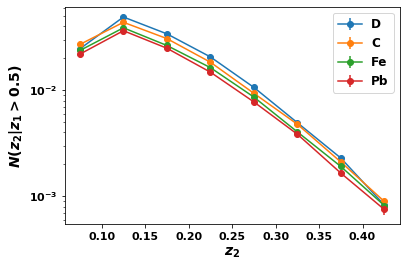

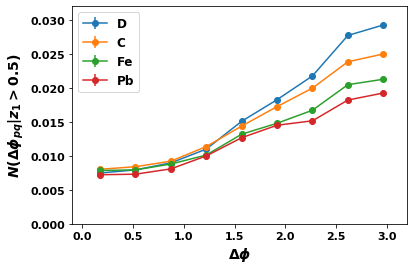

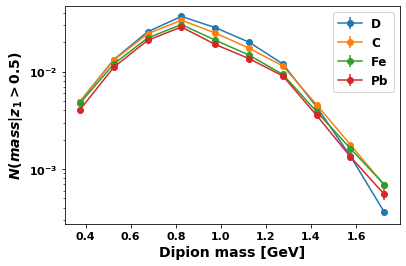

In [67]:
for j,tar in enumerate(['D','C','Fe','Pb']):
    r, err,x = getMultiplicity(df=df[tar],df_trigger=df_trigger['%s_trigger'%tar], variable='h2_z',
                               minz=0.05,maxz=0.45,nbins=9,
                               trig_cut='%s'%trigger_cut_nom,
                               pair_cut = 'h1_z>0.5 %s '%pair_cut_nom)
    plt.errorbar(x,r,err,linestyle='-',marker='o',label=tar)
                               
plt.legend(ncol=1, loc='best' ,frameon=True,fontsize=12, title='', title_fontsize=12)
#plt.ylim(0.01,0.02)

plt.gca().set_xlabel("$z_{2}$", fontweight='bold', fontsize=14) #gca stands for 'get current axis'
plt.gca().set_ylabel("$N(z_{2}|z_{1}>0.5)$", fontsize=14) #gca stands for 'get current axis'
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=11)
#plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )

plt.savefig('multiplicity_z2.pdf', bbox_inches='tight')
plt.show()

for j,tar in enumerate(['D','C','Fe','Pb']):
    r, err,x = getMultiplicity(df=df[tar],df_trigger=df_trigger['%s_trigger'%tar], variable='dphi',
                               minz=0.0,maxz=3.14,nbins=10,
                               trig_cut='%s'%trigger_cut_nom,
                               pair_cut = 'h1_z>0.5%s '%pair_cut_nom)
    plt.errorbar(x,r,err,linestyle='-',marker='o',label=tar)
                               
plt.legend(ncol=1, loc='best' ,frameon=True,fontsize=12, title='', title_fontsize=12)
plt.ylim(0.0,0.032)
plt.xlim(-0.1,3.2)
plt.gca().set_xlabel("$\\Delta\\phi$", fontsize=14) #gca stands for 'get current axis'
plt.gca().set_ylabel("$N(\Delta \phi_{pq}|z_{1}>0.5)$", fontsize=14) #gca stands for 'get current axis'
#plt.yscale('log')
#plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.tick_params(axis='both', which='major', labelsize=11)

plt.savefig('multiplicity_dphi.pdf', bbox_inches='tight')
plt.show()
for j,tar in enumerate(['D','C','Fe','Pb']):
    r, err,x = getMultiplicity(df=df[tar],df_trigger=df_trigger['%s_trigger'%tar], variable='pair_mass',
                               minz=0.3,maxz=1.8,nbins=11,
                               trig_cut='%s'%trigger_cut_nom,
                               pair_cut = 'h1_z>0.5 %s '%pair_cut_nom)
    plt.errorbar(x,r,err,linestyle='-',marker='o',label=tar)
                               
plt.legend(ncol=1, loc='best' ,frameon=True,fontsize=12, title='', title_fontsize=12)
#plt.ylim(0.0003,0.0004)
plt.gca().set_xlabel("Dipion mass [GeV]", fontweight='bold', fontsize=14) #gca stands for 'get current axis'
plt.gca().set_ylabel("$N(mass|z_{1}>0.5)$", fontsize=14) #gca stands for 'get current axis'
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=11)
#plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )

plt.savefig('multiplicity_dipionMass.pdf', bbox_inches='tight')
plt.show()


**MC case**

In [ ]:
nbins = 30
dys = []
ys = []
for tar in ['C','D','Fe','Pb']:
    a=df_mc_mix[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) ## this return the y array of values and the x arrays of bin edges 
    #print(y)
    #print(x)
    #print(x[1] ,' ; ', x[0])
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    #print('denom is ',denom)
    #print(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=2, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.ylim(0.7,1.4)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_mixedEvents_comp_MC.pdf', bbox_inches='tight')

**Including the ratios Nuclear event-mixed / D event-mixed**

In [ ]:
nbins = 30
dys = []
ys = []
for tar in ['C','D_C','Fe','D_Fe','Pb','D_Pb']:
    a=df[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) 
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Data', title_fontsize=12)
plt.ylim(0.,2.51)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_Events_comp_data.pdf', bbox_inches='tight')

**Study the Xf cut. No notizable difference wrt not applying the cut**

**Xf effect as a a function of pair $z_{2}$**

In [ ]:
fig = plt.figure(figsize=(8,6))
y_ratio={}
y_ratio_GiB={}
y_ratio_err={}
y_ratio_err_GiB={}


for i,target in enumerate(['C','Fe','Pb']):
    r_noxf, err_noxf,x_noxf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = '%s'%pair_cut_nom,
                            trig_cut = '%s '%trigger_cut_nom)
    #plt.errorbar(x_noxf+0.005*i,r_noxf,yerr=err_noxf,label='No xf, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
    r_xf, err_xf,x_xf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = '%s and h1_xf>0'%pair_cut_nom,
                            trig_cut = '%s and h1_xf>0'%trigger_cut_nom)
    #plt.errorbar(x_xf+0.005*i,r_xf,yerr=err_xf,label='h1_xf>0, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    y_ratio[target]=r_xf/r_noxf
    y_ratio_err[target]=(r_xf/r_noxf)*np.hypot(err_xf/r_xf,err_noxf/r_noxf )
    
    plt.errorbar(x_xf+0.005*i,y_ratio[target],yerr=y_ratio_err[target],label='Data, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

for i,target in enumerate(['C','Fe','Pb']):
    r_noxf_GiB, err_noxf_GiB,x_noxf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                            trig_cut='h1_z>0.5',
                        pair_cut = 'and h1_z>0.5')
    #plt.errorbar(x_noxf_GiB+0.005*i,r_noxf_GiB,yerr=err_noxf_GiB,label='GiBUU no, xf %s'%target,fmt='s',fillstyle='none',ms=8)

    r_xf_GiB, err_xf_GiB,x_xf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                            trig_cut='h1_xf>0',
                        pair_cut = 'and h1_xf>0')
    #plt.errorbar(x_xf_GiB+0.005*i,r_xf_GiB,yerr=err_xf_GiB,label='GiBUU xf ,%s'%target,fmt='s',fillstyle='none',ms=8)
    
    y_ratio_GiB[target]=r_xf_GiB/r_noxf_GiB
    y_ratio_err_GiB[target]=(r_xf_GiB/r_noxf_GiB)*np.hypot(err_xf_GiB/r_xf_GiB,err_noxf_GiB/r_noxf_GiB )
    
    plt.errorbar(x_xf+0.005*i,y_ratio_GiB[target],yerr=y_ratio_err_GiB[target],label='GiBUU, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

    
    
    
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}(xf(h_{1})>0)$/$R_{2h}$',fontsize=18)


#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper left',frameon=False,fontsize=13.5,ncol=2 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


#plt.savefig('ComparisonWithHermes_XfCut.pdf', bbox_inches='tight')
plt.show()

**Xf effect as a a function of pair $\Delta \phi$**

In [ ]:
fig = plt.figure(figsize=(8,6))
y_ratio={}
y_ratio_GiB={}
y_ratio_err={}
y_ratio_err_GiB={}


for i,target in enumerate(['C','Fe','Pb']):
    r_noxf, err_noxf,x_noxf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                        pair_cut = '%s'%pair_cut_nom,
                            trig_cut = '%s '%trigger_cut_nom)
    #plt.errorbar(x_noxf+0.005*i,r_noxf,yerr=err_noxf,label='No xf, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
    r_xf, err_xf,x_xf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                        pair_cut = '%s and h1_xf>0'%pair_cut_nom,
                            trig_cut = '%s and h1_xf>0'%trigger_cut_nom)
    #plt.errorbar(x_xf+0.005*i,r_xf,yerr=err_xf,label='h1_xf>0, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    y_ratio[target]=r_xf/r_noxf
    y_ratio_err[target]=(r_xf/r_noxf)*np.hypot(err_xf/r_xf,err_noxf/r_noxf )
    
    plt.errorbar(x_xf+0.005*i,y_ratio[target],yerr=y_ratio_err[target],label='Data, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

for i,target in enumerate(['C','Fe','Pb']):
    r_noxf_GiB, err_noxf_GiB,x_noxf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='dphi',minz=0.0,maxz=3.14, applyweight=False, 
                            trig_cut='h1_z>0.5',
                        pair_cut = 'and h1_z>0.5')
    #plt.errorbar(x_noxf_GiB+0.005*i,r_noxf_GiB,yerr=err_noxf_GiB,label='GiBUU no, xf %s'%target,fmt='s',fillstyle='none',ms=8)

    r_xf_GiB, err_xf_GiB,x_xf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='dphi',minz=0.0,maxz=3.14, applyweight=False, 
                            trig_cut='h1_xf>0',
                        pair_cut = 'and h1_xf>0')
    #plt.errorbar(x_xf_GiB+0.005*i,r_xf_GiB,yerr=err_xf_GiB,label='GiBUU xf ,%s'%target,fmt='s',fillstyle='none',ms=8)
    
    y_ratio_GiB[target]=r_xf_GiB/r_noxf_GiB
    y_ratio_err_GiB[target]=(r_xf_GiB/r_noxf_GiB)*np.hypot(err_xf_GiB/r_xf_GiB,err_noxf_GiB/r_noxf_GiB )
    
    plt.errorbar(x_xf+0.005*i,y_ratio_GiB[target],yerr=y_ratio_err_GiB[target],label='GiBUU, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

    
    
    
plt.xlabel('$\Delta \phi$',fontsize=18)
plt.ylabel('$R_{2h}(xf(h_{1})>0)$/$R_{2h}$',fontsize=18)


#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper left',frameon=False,fontsize=13.5,ncol=2 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
#plt.yticks(fontsize=14)


#plt.savefig('ComparisonWithHermes_XfCut.pdf', bbox_inches='tight')
plt.show()


**Xf effect as a a function of pair inv mass**

In [ ]:
fig = plt.figure(figsize=(8,6))
y_ratio={}
y_ratio_GiB={}
y_ratio_err={}
y_ratio_err_GiB={}
#variable='pair_mass',minz=0.3,maxz=1.8,

for i,target in enumerate(['C','Fe','Pb']):
    r_noxf, err_noxf,x_noxf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8, variable='pair_mass', 
                        pair_cut = '%s'%pair_cut_nom,
                            trig_cut = '%s '%trigger_cut_nom,nbins=12)
    #plt.errorbar(x_noxf+0.005*i,r_noxf,yerr=err_noxf,label='No xf, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
    r_xf, err_xf,x_xf = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8, variable='pair_mass', 
                        pair_cut = '%s and h1_xf>0'%pair_cut_nom,
                            trig_cut = '%s and h1_xf>0'%trigger_cut_nom,nbins=12)
    #plt.errorbar(x_xf+0.005*i,r_xf,yerr=err_xf,label='h1_xf>0, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    y_ratio[target]=r_xf/r_noxf
    y_ratio_err[target]=(r_xf/r_noxf)*np.hypot(err_xf/r_xf,err_noxf/r_noxf )
    
    plt.errorbar(x_xf+0.005*i,y_ratio[target],yerr=y_ratio_err[target],label='Data, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

for i,target in enumerate(['C','Fe','Pb']):
    r_noxf_GiB, err_noxf_GiB,x_noxf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='pair_mass',minz=0.3,maxz=1.8, applyweight=False, 
                            trig_cut='h1_z>0.5',
                        pair_cut = 'and h1_z>0.5',nbins=12)
    #plt.errorbar(x_noxf_GiB+0.005*i,r_noxf_GiB,yerr=err_noxf_GiB,label='GiBUU no, xf %s'%target,fmt='s',fillstyle='none',ms=8)

    r_xf_GiB, err_xf_GiB,x_xf_GiB = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='pair_mass',minz=0.3,maxz=1.8, applyweight=False, 
                            trig_cut='h1_xf>0',
                        pair_cut = 'and h1_xf>0',nbins=12)
    #plt.errorbar(x_xf_GiB+0.005*i,r_xf_GiB,yerr=err_xf_GiB,label='GiBUU xf ,%s'%target,fmt='s',fillstyle='none',ms=8)
    
    y_ratio_GiB[target]=r_xf_GiB/r_noxf_GiB
    y_ratio_err_GiB[target]=(r_xf_GiB/r_noxf_GiB)*np.hypot(err_xf_GiB/r_xf_GiB,err_noxf_GiB/r_noxf_GiB )
    
    plt.errorbar(x_xf+0.005*i,y_ratio_GiB[target],yerr=y_ratio_err_GiB[target],label='GiBUU, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting

    
    
    
plt.xlabel('$Dipion mass$',fontsize=18)
plt.ylabel('$R_{2h}(xf(h_{1})>0)$/$R_{2h}$',fontsize=18)


#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper left',frameon=False,fontsize=13.5,ncol=2 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
#plt.yticks(fontsize=14)


#plt.savefig('ComparisonWithHermes_XfCut.pdf', bbox_inches='tight')
plt.show()


# Comparison with Sebouh's numbers

**direct comparison between the mixed event distributions that sebastian moran gets in data and MC with the ones that Sebouh gets in data and MC with his method**

**Saving Sebouh's numbers into arrays**

In [ ]:
x=[]
y_all_C=[]
erry_all_C=[]
y_all_Fe=[]
erry_all_Fe=[]
y_all_Pb=[]
erry_all_Pb=[]

## different pairs
y_pp_C=[]
erry_pp_C=[]
y_pp_Fe=[]
erry_pp_Fe=[]
y_pp_Pb=[]
erry_pp_Pb=[]

y_pm_C=[]
erry_pm_C=[]
y_pm_Fe=[]
erry_pm_Fe=[]
y_pm_Pb=[]
erry_pm_Pb=[]

y_mp_C=[]
erry_mp_C=[]
y_mp_Fe=[]
erry_mp_Fe=[]
y_mp_Pb=[]
erry_mp_Pb=[]

y_mm_C=[]
erry_mm_C=[]
y_mm_Fe=[]
erry_mm_Fe=[]
y_mm_Pb=[]
erry_mm_Pb=[]

# different z bins

y_z_1_C=[]
erry_z_1_C=[]
y_z_1_Fe=[]
erry_z_1_Fe=[]   
y_z_1_Pb=[]
erry_z_1_Pb=[]

y_z_2_C=[]
erry_z_2_C=[]
y_z_2_Fe=[]
erry_z_2_Fe=[]   
y_z_2_Pb=[]
erry_z_2_Pb=[]

y_z_3_C=[]
erry_z_3_C=[]
y_z_3_Fe=[]
erry_z_3_Fe=[]   
y_z_3_Pb=[]
erry_z_3_Pb=[]

y_z_4_C=[]
erry_z_4_C=[]
y_z_4_Fe=[]
erry_z_4_Fe=[]   
y_z_4_Pb=[]
erry_z_4_Pb=[]

with open('all_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        x.append(currentline[0])
        y_all_C.append( float(currentline[1]) )       
        erry_all_C.append(float(currentline[2]))
with open('all_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_all_Fe.append(float(currentline[1]))        
        erry_all_Fe.append(float(currentline[2]))
with open('all_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_all_Pb.append(float(currentline[1]))        
        erry_all_Pb.append(float(currentline[2]))  
        
with open('pp_pp_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pp_C.append(float(currentline[1]))        
        erry_pp_C.append(float(currentline[2]))        
with open('pp_pp_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pp_Fe.append(float(currentline[1]))        
        erry_pp_Fe.append(float(currentline[2]))  
with open('pp_pp_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pp_Pb.append(float(currentline[1]))        
        erry_pp_Pb.append(float(currentline[2]))          

with open('pp_pm_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pm_C.append(float(currentline[1]))        
        erry_pm_C.append(float(currentline[2]))        
with open('pp_pm_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pm_Fe.append(float(currentline[1]))        
        erry_pm_Fe.append(float(currentline[2]))  
with open('pp_pm_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_pm_Pb.append(float(currentline[1]))        
        erry_pm_Pb.append(float(currentline[2]))          
        
with open('pm_pp_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mp_C.append(float(currentline[1]))        
        erry_mp_C.append(float(currentline[2]))        
with open('pm_pp_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mp_Fe.append(float(currentline[1]))        
        erry_mp_Fe.append(float(currentline[2]))  
with open('pm_pp_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mp_Pb.append(float(currentline[1]))        
        erry_mp_Pb.append(float(currentline[2]))          
                
with open('pm_pm_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mm_C.append(float(currentline[1]))        
        erry_mm_C.append(float(currentline[2]))        
with open('pm_pm_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mm_Fe.append(float(currentline[1]))        
        erry_mm_Fe.append(float(currentline[2]))  
with open('pm_pm_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_mm_Pb.append(float(currentline[1]))        
        erry_mm_Pb.append(float(currentline[2]))          

        
with open('z_1_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_1_C.append(float(currentline[1]))        
        erry_z_1_C.append(float(currentline[2]))         
        
with open('z_1_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_1_Fe.append(float(currentline[1]))        
        erry_z_1_Fe.append(float(currentline[2]))
        
with open('z_1_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_1_Pb.append(float(currentline[1]))        
        erry_z_1_Pb.append(float(currentline[2]))         
                
with open('z_2_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_2_C.append(float(currentline[1]))        
        erry_z_2_C.append(float(currentline[2]))         
        
with open('z_2_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_2_Fe.append(float(currentline[1]))        
        erry_z_2_Fe.append(float(currentline[2]))
        
with open('z_2_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_2_Pb.append(float(currentline[1]))        
        erry_z_2_Pb.append(float(currentline[2]))         
                
with open('z_3_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_3_C.append(float(currentline[1]))        
        erry_z_3_C.append(float(currentline[2]))         
        
with open('z_3_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_3_Fe.append(float(currentline[1]))        
        erry_z_3_Fe.append(float(currentline[2]))
        
with open('z_3_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_3_Pb.append(float(currentline[1]))        
        erry_z_3_Pb.append(float(currentline[2]))         
        
with open('z_4_C.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_4_C.append(float(currentline[1]))        
        erry_z_4_C.append(float(currentline[2]))         
        
with open('z_4_Fe.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_4_Fe.append(float(currentline[1]))        
        erry_z_4_Fe.append(float(currentline[2]))
        
with open('z_4_Pb.txt','r') as f:
    for line in f:
        currentline=line.split(",")
        y_z_4_Pb.append(float(currentline[1]))        
        erry_z_4_Pb.append(float(currentline[2]))         
                
        
        
        
        
x_ar=np.asarray(x)
y_all_C_ar=np.asarray(y_all_C)        
erry_all_C_ar=np.asarray(erry_all_C)        
y_all_Fe_ar=np.asarray(y_all_Fe)        
erry_all_Fe_ar=np.asarray(erry_all_Fe)        
y_all_Pb_ar=np.asarray(y_all_Pb)        
erry_all_Pb_ar=np.asarray(erry_all_Pb)        

y_pp_C_ar=np.asarray(y_pp_C)        
erry_pp_C_ar=np.asarray(erry_pp_C) 
y_pp_Fe_ar=np.asarray(y_pp_Fe)        
erry_pp_Fe_ar=np.asarray(erry_pp_Fe) 
y_pp_Pb_ar=np.asarray(y_pp_Pb)        
erry_pp_Pb_ar=np.asarray(erry_pp_Pb) 

y_pm_C_ar=np.asarray(y_pm_C)        
erry_pm_C_ar=np.asarray(erry_pm_C) 
y_pm_Fe_ar=np.asarray(y_pm_Fe)        
erry_pm_Fe_ar=np.asarray(erry_pm_Fe) 
y_pm_Pb_ar=np.asarray(y_pm_Pb)        
erry_pm_Pb_ar=np.asarray(erry_pm_Pb) 

y_mp_C_ar=np.asarray(y_mp_C)        
erry_mp_C_ar=np.asarray(erry_mp_C) 
y_mp_Fe_ar=np.asarray(y_mp_Fe)        
erry_mp_Fe_ar=np.asarray(erry_mp_Fe) 
y_mp_Pb_ar=np.asarray(y_mp_Pb)        
erry_mp_Pb_ar=np.asarray(erry_mp_Pb) 

y_mm_C_ar=np.asarray(y_mm_C)        
erry_mm_C_ar=np.asarray(erry_mm_C) 
y_mm_Fe_ar=np.asarray(y_mm_Fe)        
erry_mm_Fe_ar=np.asarray(erry_mm_Fe) 
y_mm_Pb_ar=np.asarray(y_mm_Pb)        
erry_mm_Pb_ar=np.asarray(erry_mm_Pb) 



y_z_1_C_ar=np.asarray(y_z_1_C)
y_z_1_Fe_ar=np.asarray(y_z_1_Fe)
y_z_1_Pb_ar=np.asarray(y_z_1_Pb)
erry_z_1_C_ar=np.asarray(erry_z_1_C)
erry_z_1_Fe_ar=np.asarray(erry_z_1_Fe)
erry_z_1_Pb_ar=np.asarray(erry_z_1_Pb)

y_z_2_C_ar=np.asarray(y_z_2_C)
y_z_2_Fe_ar=np.asarray(y_z_2_Fe)
y_z_2_Pb_ar=np.asarray(y_z_2_Pb)
erry_z_2_C_ar=np.asarray(erry_z_2_C)
erry_z_2_Fe_ar=np.asarray(erry_z_2_Fe)
erry_z_2_Pb_ar=np.asarray(erry_z_2_Pb)

y_z_3_C_ar=np.asarray(y_z_3_C)
y_z_3_Fe_ar=np.asarray(y_z_3_Fe)
y_z_3_Pb_ar=np.asarray(y_z_3_Pb)
erry_z_3_C_ar=np.asarray(erry_z_3_C)
erry_z_3_Fe_ar=np.asarray(erry_z_3_Fe)
erry_z_3_Pb_ar=np.asarray(erry_z_3_Pb)

y_z_4_C_ar=np.asarray(y_z_4_C)
y_z_4_Fe_ar=np.asarray(y_z_4_Fe)
y_z_4_Pb_ar=np.asarray(y_z_4_Pb)
erry_z_4_C_ar=np.asarray(erry_z_4_C)
erry_z_4_Fe_ar=np.asarray(erry_z_4_Fe)
erry_z_4_Pb_ar=np.asarray(erry_z_4_Pb)





#print(type(y_all_Pb))
#plt.errorbar(x,y=y_all_C,yerr=erry_all_C,fmt='o',label='C')        
#plt.errorbar(x,y=y_all_Fe,yerr=erry_all_Fe,fmt='o',label='Fe')  
#plt.errorbar(x,y=y_all_Pb,yerr=erry_all_Pb,fmt='o',label='Pb')  
plt.errorbar(x,y=y_all_C_ar,yerr=erry_all_C_ar,fmt='s',label='C Sebouh')  


**Main case to compare, all pairs, for data**

In [ ]:
y = {}
erry = {}

## for data
ys = []
dys = []
x2=[]
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    #plt.errorbar(x2[0],y,dy,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==0:
        tmp=y/y_all_C_ar
        errtmp= y/y_all_C_ar *np.hypot(dy/y,  erry_all_C_ar/y_all_C_ar  )
        plt.errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_all_Fe_ar
        errtmp= y/y_all_Fe_ar *np.hypot(dy/y,  erry_all_Fe_ar/y_all_Fe_ar  )
        plt.errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_all_Pb_ar
        errtmp= y/y_all_Pb_ar *np.hypot(dy/y,  erry_all_Pb_ar/y_all_Pb_ar  )
        plt.errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        

#plt.errorbar(x2[0],y=y_all_C_ar,yerr=erry_all_C_ar,fmt='s',label='C Sebouh', fillstyle='none',color='#1f77b4')    
#plt.errorbar(x2[0],y=y_all_Fe_ar,yerr=erry_all_Fe_ar,fmt='s',label='Fe Sebouh', fillstyle='none',color='#ff7f0e')    
#plt.errorbar(x2[0],y=y_all_Pb_ar,yerr=erry_all_Pb_ar,fmt='s',label='Pb Sebouh', fillstyle='none',color='#2ca02c')    

    
plt.legend(ncol=3, loc='upper right' ,frameon=True,fontsize=12, title='Mixed events (Data, All pairs)', title_fontsize=12)
plt.gca().set_ylabel("$(N_{A}/N_{D})_{Seba} / (N_{A}/N_{D})_{Sebouh}$")
plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
plt.axhline(y=1.0,color='black',linestyle='--')
plt.ylim(0.8,1.23)


plt.savefig('compSebouhSebaMixedEvents.pdf', bbox_inches='tight')

plt.show()  


**Comparing the different configurations of pairs**

In [ ]:
fig, axs = plt.subplots(2, 2,sharex=True, sharey=True,figsize=(14,9),gridspec_kw={'hspace': 0., 'wspace':0.})
#the default case is pp
ys = []
dys = []
ys_pm = []
dys_pm = []
ys_mp = []
dys_mp = []
ys_mm = []
dys_mm = []

x2=[]
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and h1_pid==211 and h2_pid==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_pp_C_ar
        errtmp= y/y_pp_C_ar *np.hypot(dy/y,  erry_pp_C_ar/y_pp_C_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_pp_Fe_ar
        errtmp= y/y_pp_Fe_ar *np.hypot(dy/y,  erry_pp_Fe_ar/y_pp_Fe_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_pp_Pb_ar
        errtmp= y/y_pp_Pb_ar *np.hypot(dy/y,  erry_pp_Pb_ar/y_pp_Pb_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
        

for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and h1_pid==211 and h2_pid==-211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_pm_C_ar
        errtmp= y/y_pm_C_ar *np.hypot(dy/y,  erry_pm_C_ar/y_pm_C_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_pm_Fe_ar
        errtmp= y/y_pm_Fe_ar *np.hypot(dy/y,  erry_pm_Fe_ar/y_pm_Fe_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_pm_Pb_ar
        errtmp= y/y_pm_Pb_ar *np.hypot(dy/y,  erry_pm_Pb_ar/y_pm_Pb_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
        
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and h1_pid==-211 and h2_pid==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_mp_C_ar
        errtmp= y/y_mp_C_ar *np.hypot(dy/y,  erry_mp_C_ar/y_mp_C_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_mp_Fe_ar
        errtmp= y/y_mp_Fe_ar *np.hypot(dy/y,  erry_mp_Fe_ar/y_mp_Fe_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_mp_Pb_ar
        errtmp= y/y_mp_Pb_ar *np.hypot(dy/y,  erry_mp_Pb_ar/y_mp_Pb_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h1_z>0.5 and h1_pid==-211 and h2_pid==-211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_mm_C_ar
        errtmp= y/y_mm_C_ar *np.hypot(dy/y,  erry_mm_C_ar/y_mm_C_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_mm_Fe_ar
        errtmp= y/y_mm_Fe_ar *np.hypot(dy/y,  erry_mm_Fe_ar/y_mm_Fe_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_mm_Pb_ar
        errtmp= y/y_mm_Pb_ar *np.hypot(dy/y,  erry_mm_Pb_ar/y_mm_Pb_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
axs[0][0].axhline(y=1.0,color='black',linestyle='--')
axs[0][1].axhline(y=1.0,color='black',linestyle='--')
axs[1][0].axhline(y=1.0,color='black',linestyle='--')
axs[1][1].axhline(y=1.0,color='black',linestyle='--')
axs[1][1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[1][0].set_xlabel('$\Delta \phi [rad]$',fontsize=18)

axs[0][0].legend(loc='upper left',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data, $\pi^{+}\pi^{+}$')
axs[0][1].legend(loc='upper left',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data, $\pi^{+}\pi^{-}$')
axs[1][0].legend(loc='upper left',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data, $\pi^{-}\pi^{+}$')
axs[1][1].legend(loc='upper left',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data, $\pi^{-}\pi^{-}$')

axs[0][0].set_ylabel("$(N_{A}/N_{D})_{Seba} / (N_{A}/N_{D})_{Sebouh}$",fontsize=13)
axs[1][0].set_ylabel("$(N_{A}/N_{D})_{Seba} / (N_{A}/N_{D})_{Sebouh}$",fontsize=13)

plt.savefig('compSebouhSebaMixedEvents_AllDiffPairs.pdf', bbox_inches='tight')
plt.show()

**Now, for the case of different z bins**

In [ ]:
fig, axs = plt.subplots(2, 2,sharex=True, sharey=True,figsize=(14,9),gridspec_kw={'hspace': 0., 'wspace':0.})
#the default case is pp
ys = []
dys = []
ys_pm = []
dys_pm = []
ys_mp = []
dys_mp = []
ys_mm = []
dys_mm = []

x2=[]
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.1 and h2_z<0.2 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_z_1_C_ar
        errtmp= y/y_z_1_C_ar *np.hypot(dy/y,  erry_z_1_C_ar/y_z_1_C_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_z_1_Fe_ar
        errtmp= y/y_z_1_Fe_ar *np.hypot(dy/y,  erry_z_1_Fe_ar/y_z_1_Fe_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_z_1_Pb_ar
        errtmp= y/y_z_1_Pb_ar *np.hypot(dy/y,  erry_z_1_Pb_ar/y_z_1_Pb_ar  )
        axs[0][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
        

for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.2 and h2_z<0.3 and h1_z>0.5 and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_z_2_C_ar
        errtmp= y/y_z_2_C_ar *np.hypot(dy/y,  erry_z_2_C_ar/y_z_2_C_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_z_2_Fe_ar
        errtmp= y/y_z_2_Fe_ar *np.hypot(dy/y,  erry_z_2_Fe_ar/y_z_2_Fe_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_z_2_Pb_ar
        errtmp= y/y_z_2_Pb_ar *np.hypot(dy/y,  erry_z_2_Pb_ar/y_z_2_Pb_ar  )
        axs[0][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
        
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.3 and h2_z<0.4 and h1_z>0.5  and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_z_3_C_ar
        errtmp= y/y_z_3_C_ar *np.hypot(dy/y,  erry_z_3_C_ar/y_z_3_C_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_z_3_Fe_ar
        errtmp= y/y_z_3_Fe_ar *np.hypot(dy/y,  erry_z_3_Fe_ar/y_z_3_Fe_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_z_3_Pb_ar
        errtmp= y/y_z_3_Pb_ar *np.hypot(dy/y,  erry_z_3_Pb_ar/y_z_3_Pb_ar  )
        axs[1][0].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
for j,a in enumerate(['D_C', 'D_Fe', 'D_Pb', 'C' ,'Fe' ,'Pb']):
    mix = df_mix[a]
    y,x = np.histogram(mix.query('h2_z>0.4 and h2_z<0.5 and h1_z>0.5  and abs(h1_pid)==211 and abs(h2_pid)==211 %s'%pair_cut_nom).dphi,
                       bins=10, range=(0,np.pi))
    x = np.add(x[:-1],x[1:])/2
    dy = np.sqrt(y)
    denom = np.mean(y)
    ys.append(y)
    dys.append(dy)    
    x2.append(x)
for i,tar in enumerate(['C','Fe','Pb']):
    y = ys[i+3]/ys[i]
    dy = ys[i+3]/ys[i]*np.hypot(dys[i]/ys[i],dys[i+3]/ys[i+3])
    denom = np.average(y)
    y/=denom
    dy/=denom
    if i==0:
        tmp=y/y_z_4_C_ar
        errtmp= y/y_z_4_C_ar *np.hypot(dy/y,  erry_z_4_C_ar/y_z_4_C_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
    if i==1:
        tmp=y/y_z_4_Fe_ar
        errtmp= y/y_z_4_Fe_ar *np.hypot(dy/y,  erry_z_4_Fe_ar/y_z_4_Fe_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)    
    if i==2:
        tmp=y/y_z_4_Pb_ar
        errtmp= y/y_z_4_Pb_ar *np.hypot(dy/y,  erry_z_4_Pb_ar/y_z_4_Pb_ar  )
        axs[1][1].errorbar(x2[0],tmp,errtmp,linestyle='',marker='o',label=tar,alpha=0.8)
        
axs[0][0].axhline(y=1.0,color='black',linestyle='--')
axs[0][1].axhline(y=1.0,color='black',linestyle='--')
axs[1][0].axhline(y=1.0,color='black',linestyle='--')
axs[1][1].axhline(y=1.0,color='black',linestyle='--')
axs[1][1].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
axs[1][0].set_xlabel('$\Delta \phi [rad]$',fontsize=18)

axs[0][0].legend(loc='upper center',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data (All pairs), $0.1<z_{2}<0.2$')
axs[0][1].legend(loc='upper center',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data (All pairs), $0.2<z_{2}<0.3$')
axs[1][0].legend(loc='upper center',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data (All pairs), $0.3<z_{2}<0.4$')
axs[1][1].legend(loc='upper center',ncol=3,frameon=False,fontsize=12, borderaxespad=0.3, title='Data (All pairs), $0.4<z_{2}<0.5$')

axs[0][0].set_ylabel("$(N_{A}/N_{D})_{Seba} / (N_{A}/N_{D})_{Sebouh}$",fontsize=13)
axs[1][0].set_ylabel("$(N_{A}/N_{D})_{Seba} / (N_{A}/N_{D})_{Sebouh}$",fontsize=13)

axs[1][0].set_ylim(0.75,1.3)

plt.savefig('compSebouhSebaMixedEvents_AllDiffZhBins.pdf', bbox_inches='tight')
plt.show()

**Invariant mass plots**

In [ ]:
fig, axs = plt.subplots(1, 2,sharex=True, sharey=False,figsize=(14,5),gridspec_kw={'hspace': 0., 'wspace':0.3})
minz=0.05
maxz=1.2
nbins=100
op_sign='and h1_pid*h2_pid<0'
eq_sign='and h1_pid*h2_pid>0'

#axs[0].errorbar(x,y,label=tar,alpha=0.8)
axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom)['pair_mass'],alpha=0.8,histtype='stepfilled', bins=nbins, label='Total')
axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom + op_sign)['pair_mass'],alpha=0.8,histtype='stepfilled', bins=nbins, label='Opposite sign')
axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom + eq_sign)['pair_mass'],alpha=0.8,histtype='stepfilled', bins=nbins, label='Same sign')

axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom)['pair_mass'],alpha=0.8, bins=nbins,histtype='stepfilled', label='Total')
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom + op_sign)['pair_mass'],alpha=0.8,histtype='stepfilled', bins=nbins, label='Opposite sign')
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom + eq_sign)['pair_mass'],alpha=0.8,histtype='stepfilled', bins=nbins, label='Same sign')
axs[0].set_xlim(0.2,2.0)
axs[0].set_xlabel('dipion invariant mass [GeV]',fontweight='bold')
axs[1].set_xlabel('dipion invariant mass [GeV]',fontweight='bold')
axs[0].set_ylabel('entries',fontweight='bold')
axs[1].set_ylabel('entries',fontweight='bold')
axs[0].legend(loc='upper right',ncol=1,frameon=True,fontsize=12, borderaxespad=0.3, title='')
axs[1].legend(loc='upper right',ncol=1,frameon=True,fontsize=12, borderaxespad=0.3, title='')
axs[0].set_title('Deuterium Target',fontweight='bold')
axs[1].set_title('Nuclear Target',fontweight='bold')
plt.savefig('dipionInvMassD_A_comparisonSigns.pdf', bbox_inches='tight')

plt.show()

**Invariant mass plots, using SEABORN (it doesn't really work, because the distributions are normalized (prob) and youo can not see how small is the green distribution compared to the other ones)**

In [ ]:
fig, axs = plt.subplots(1, 2,sharex=True, sharey=False,figsize=(14,5),gridspec_kw={'hspace': 0., 'wspace':0.3})
minz=0.05
maxz=1.2
nbins=100
op_sign='and h1_pid*h2_pid<0'
eq_sign='and h1_pid*h2_pid>0'
nalpha=1
#axs[0].errorbar(x,y,label=tar,alpha=0.8)


sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom)['pair_mass'],kde_kws={'lw':nlw, 'shade':True}, hist=False, rug=False, color='#1f77b4', ax=axs[0])
sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+ op_sign)['pair_mass'],kde_kws={'lw':nlw, 'shade':True}, hist=False, rug=False, color='#ff7f0e', ax=axs[0])
sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+ eq_sign)['pair_mass'],kde_kws={'lw':nlw, 'shade':True}, hist=False, rug=False, color='#2ca02c', ax=axs[0])




#axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom)['pair_mass'],alpha=nalpha,histtype='stepfilled', bins=nbins, label='Total')
#axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom + op_sign)['pair_mass'],alpha=nalpha,histtype='stepfilled', bins=nbins, label='Opposite sign')
#axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom + eq_sign)['pair_mass'],alpha=nalpha,histtype='stepfilled', bins=nbins, label='Same sign')

axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom)['pair_mass'],alpha=nalpha, bins=nbins,histtype='stepfilled', label='Total')
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom + op_sign)['pair_mass'],alpha=nalpha,histtype='stepfilled', bins=nbins, label='Opposite sign')
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom + eq_sign)['pair_mass'],alpha=nalpha,histtype='stepfilled', bins=nbins, label='Same sign')
axs[0].set_xlim(0.2,2.0)
axs[0].set_xlabel('dipion invariant mass [GeV]',fontweight='bold')
axs[1].set_xlabel('dipion invariant mass [GeV]',fontweight='bold')
axs[0].set_ylabel('entries',fontweight='bold')
axs[1].set_ylabel('entries',fontweight='bold')
axs[0].legend(loc='upper right',ncol=1,frameon=True,fontsize=12, borderaxespad=0.3, title='')
axs[1].legend(loc='upper right',ncol=1,frameon=True,fontsize=12, borderaxespad=0.3, title='')
axs[0].set_title('Deuterium Target',fontweight='bold')
axs[1].set_title('Nuclear Target',fontweight='bold')


#plt.savefig('dipionInvMassD_A_comparisonSigns.pdf', bbox_inches='tight')

plt.show()

**Missing Mass plots, for different bins in h2_z**

In [ ]:
from matplotlib import lines
fig, axs = plt.subplots(1, 4,sharex=True, sharey=True,figsize=(16,5),gridspec_kw={'hspace': 0., 'wspace':0.})
minz=0.05
maxz=1.2
nbins=250
z_1_bin='and h2_z>0.05 and h2_z<0.1'
z_2_bin='and h2_z>0.1 and h2_z<0.2'
z_3_bin='and h2_z>0.2 and h2_z<0.3'
z_4_bin='and h2_z>0.3 and h2_z<0.5'
nlw=2

axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],alpha=0.8,lw=nlw, bins=nbins, histtype='step', label='D', density=True)
axs[0].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='C', density=True)
axs[0].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[0].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

axs[1].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='D', density=True)
axs[1].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='C', density=True)
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[1].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Pb', density=True)

axs[2].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='D', density=True)
axs[2].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='C', density=True)
axs[2].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[2].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

axs[3].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins,lw=nlw, histtype='step',label='D', density=True)
axs[3].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='C', density=True)
axs[3].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Fe', density=True)
axs[3].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

for i in range(4):    axs[i].axvline(x=0.93956,color='gainsboro',linestyle='--') ## neutron mass
axs[0].set_xlim(0.3,1.8)

lgd = []
lgd.append(lines.Line2D([0,0],[0,1], color = '#1f77b4',lw=nlw, label = 'D'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#ff7f0e',lw=nlw, label = 'C'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#2ca02c',lw=nlw, label = 'Fe'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#d62728',lw=nlw, label = 'Pb'))

for i in range(4):    
    axs[i].legend(handles = lgd,fontsize=12)
    axs[i].set_xlabel('Missing mass dipion [GeV]',fontsize=12, fontweight='bold')
axs[0].set_ylabel('Entries',fontsize=12, fontweight='bold')    
axs[0].set_title('$z_{1}>0.5$ \n $0.05<z_{2}<0.10$',fontsize=13)
axs[1].set_title('$z_{1}>0.5$ \n $0.10<z_{2}<0.20$',fontsize=13)
axs[2].set_title('$z_{1}>0.5$ \n $0.20<z_{2}<0.30$',fontsize=13)
axs[3].set_title('$z_{1}>0.5$ \n $0.30<z_{2}<0.50$',fontsize=13)
plt.savefig('MissingMassD_A_comparisonZ2bins.pdf', bbox_inches='tight')

plt.show()

**Same as before, but this time using seaborn**

In [ ]:
#sns.kdeplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x']   )


from matplotlib import lines
fig, axs = plt.subplots(1, 4,sharex=True, sharey=True,figsize=(16,5),gridspec_kw={'hspace': 0., 'wspace':0.})
minz=0.05
maxz=1.2
nbins=2
z_1_bin='and h2_z>0.05 and h2_z<=0.1'
z_2_bin='and h2_z>=0.1 and h2_z<=0.2'
z_3_bin='and h2_z>=0.2 and h2_z<=0.3'
z_4_bin='and h2_z>=0.3 and h2_z<=0.5'
nlw=3


#axs[0].sns.kdeplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'])
#sns.despine(left=True)

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[0])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'], kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#ff7f0e', ax=axs[0])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#2ca02c', ax=axs[0])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#d62728', ax=axs[0])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[1])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#ff7f0e', ax=axs[1])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#2ca02c', ax=axs[1])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#d62728', ax=axs[1])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[2])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#ff7f0e', ax=axs[2])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#2ca02c', ax=axs[2])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['mx_eh1h2x'], kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#d62728', ax=axs[2])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#1f77b4', ax=axs[3])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#ff7f0e', ax=axs[3])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#2ca02c', ax=axs[3])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['mx_eh1h2x'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#d62728', ax=axs[3])

for i in range(4):    axs[i].axvline(x=0.93956,color='gainsboro',linestyle='--') ## neutron mass
axs[0].set_xlim(0.3,1.8)

lgd = []
lgd.append(lines.Line2D([0,0],[0,1], color = '#1f77b4',lw=nlw, label = 'D'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#ff7f0e',lw=nlw, label = 'C'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#2ca02c',lw=nlw, label = 'Fe'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#d62728',lw=nlw, label = 'Pb'))

for i in range(4):    
    axs[i].legend(handles = lgd,fontsize=12)
    axs[i].set_xlabel('Missing mass dipion [GeV]',fontsize=12, fontweight='bold')
axs[0].set_ylabel('Entries',fontsize=12, fontweight='bold')    
axs[0].set_title('$z_{1}>0.5$ \n $0.05<z_{2}<0.10$',fontsize=13)
axs[1].set_title('$z_{1}>0.5$ \n $0.10<z_{2}<0.20$',fontsize=13)
axs[2].set_title('$z_{1}>0.5$ \n $0.20<z_{2}<0.30$',fontsize=13)
axs[3].set_title('$z_{1}>0.5$ \n $0.30<z_{2}<0.50$',fontsize=13)
plt.savefig('MissingMassD_A_comparisonZ2bins.pdf', bbox_inches='tight')

plt.show()

**Dipion Invariant Mass plots, for different bins in h2_z**

In [ ]:
from matplotlib import lines
fig, axs = plt.subplots(1, 4,sharex=True, sharey=True,figsize=(16,5),gridspec_kw={'hspace': 0., 'wspace':0.})
nbins=80
z_1_bin='and h2_z>0.05 and h2_z<0.1'
z_2_bin='and h2_z>=0.1 and h2_z<0.15'
z_3_bin='and h2_z>=0.15 and h2_z<0.2'
z_4_bin='and h2_z>=0.2 and h2_z<0.25'
nlw=2

axs[0].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],alpha=0.8,lw=nlw, bins=nbins, histtype='step', label='D', density=True)
axs[0].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='C', density=True)
axs[0].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[0].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

axs[1].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='D', density=True)
axs[1].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='C', density=True)
axs[1].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[1].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Pb', density=True)

axs[2].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='D', density=True)
axs[2].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='C', density=True)
axs[2].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step', label='Fe', density=True)
axs[2].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

axs[3].hist(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],alpha=0.8, bins=nbins,lw=nlw, histtype='step',label='D', density=True)
axs[3].hist(df['C'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='C', density=True)
axs[3].hist(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Fe', density=True)
axs[3].hist(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],alpha=0.8, bins=nbins, lw=nlw,histtype='step', label='Pb', density=True)

for i in range(4):    axs[i].axvline(x=0.77,color='gainsboro',linestyle='--') ## rho0 mass
axs[0].set_xlim(0.3,2.1)
#axs[0].set_ylim(-0.1,2.7)
lgd = []
lgd.append(lines.Line2D([0,0],[0,1], color = '#1f77b4',lw=nlw, label = 'D'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#ff7f0e',lw=nlw, label = 'C'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#2ca02c',lw=nlw, label = 'Fe'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#d62728',lw=nlw, label = 'Pb'))

for i in range(4):    
    axs[i].legend(handles = lgd,fontsize=12)
    axs[i].set_xlabel('Dipion Inv mass [GeV]',fontsize=12, fontweight='bold')
axs[0].set_ylabel('Entries',fontsize=12, fontweight='bold')    
axs[0].set_title('$z_{1}>0.5$ \n $0.05<z_{2}<0.10$',fontsize=13)
axs[1].set_title('$z_{1}>0.5$ \n $0.10<z_{2}<0.15$',fontsize=13)
axs[2].set_title('$z_{1}>0.5$ \n $0.15<z_{2}<0.20$',fontsize=13)
axs[3].set_title('$z_{1}>0.5$ \n $0.20<z_{2}<0.25$',fontsize=13)
plt.savefig('InvMassD_A_comparisonZ2bins.pdf', bbox_inches='tight')
plt.show()

**Dipion Invariant Mass plots, for different bins in h2_z, using SEABORN**

In [ ]:
from matplotlib import lines
fig, axs = plt.subplots(1, 4,sharex=True, sharey=True,figsize=(16,5),gridspec_kw={'hspace': 0., 'wspace':0.})
nbins=80
z_1_bin='and h2_z>0.05 and h2_z<0.1'
z_2_bin='and h2_z>=0.1 and h2_z<0.15'
z_3_bin='and h2_z>=0.15 and h2_z<0.2'
z_4_bin='and h2_z>=0.2 and h2_z<0.25'
nlw=3


sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[0])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'], kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#ff7f0e', ax=axs[0])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#2ca02c', ax=axs[0])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_1_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#d62728', ax=axs[0])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[1])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#ff7f0e', ax=axs[1])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#2ca02c', ax=axs[1])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_2_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#d62728', ax=axs[1])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#1f77b4', ax=axs[2])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#ff7f0e', ax=axs[2])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'],kde_kws={'lw':nlw},  bins=nbins,hist=False, rug=False, color='#2ca02c', ax=axs[2])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_3_bin)['pair_mass'], kde_kws={'lw':nlw}, bins=nbins,hist=False, rug=False, color='#d62728', ax=axs[2])

sns.distplot(df['D_Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#1f77b4', ax=axs[3])
sns.distplot(df['C'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#ff7f0e', ax=axs[3])
sns.distplot(df['Fe'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#2ca02c', ax=axs[3])
sns.distplot(df['Pb'].query(trigger_cut_nom+pair_cut_nom+z_4_bin)['pair_mass'],kde_kws={'lw':nlw}, bins=nbins, hist=False, rug=False, color='#d62728', ax=axs[3])

for i in range(4):    axs[i].axvline(x=0.77,color='gainsboro',linestyle='--') ## rho0 mass
axs[0].set_xlim(0.,2.)
#axs[0].set_ylim(-0.1,2.7)
lgd = []
lgd.append(lines.Line2D([0,0],[0,1], color = '#1f77b4',lw=nlw, label = 'D'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#ff7f0e',lw=nlw, label = 'C'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#2ca02c',lw=nlw, label = 'Fe'))
lgd.append(lines.Line2D([0,0],[0,1], color = '#d62728',lw=nlw, label = 'Pb'))

for i in range(4):    
    axs[i].legend(handles = lgd,fontsize=12)
    axs[i].set_xlabel('Dipion Inv mass [GeV]',fontsize=12, fontweight='bold')
axs[0].set_ylabel('Entries',fontsize=12, fontweight='bold')    
axs[0].set_title('$z_{1}>0.5$ \n $0.05<z_{2}<0.10$',fontsize=13)
axs[1].set_title('$z_{1}>0.5$ \n $0.10<z_{2}<0.15$',fontsize=13)
axs[2].set_title('$z_{1}>0.5$ \n $0.15<z_{2}<0.20$',fontsize=13)
axs[3].set_title('$z_{1}>0.5$ \n $0.20<z_{2}<0.25$',fontsize=13)
plt.savefig('InvMassD_A_comparisonZ2bins.pdf', bbox_inches='tight')
plt.show()

**R2h for different Nu and Q2 bins**

**Nu dependence**

In [ ]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,10),gridspec_kw={'hspace': 0.3, 'wspace':0.})

nulabel = {} 
nulabel['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel['bin_2'] = r'$3.2<\nu<3.7$ $GeV$' 
nulabel['bin_3'] = r'$3.7<\nu<4.2$ $GeV$' 

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x2+0.005*i,r2,yerr=err2,label=nulabel['bin_1']if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and nu>3.2 and nu<3.7  and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and nu>3.2 and nu<3.7 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x3+0.005*i,r3,yerr=err3,label=nulabel['bin_2']if i == 0 else "",fmt='o',ms=8) 

for i,target in enumerate(['C','Fe','Pb']):    
    r4, err4,x4 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x4+0.005*i,r4,yerr=err4,label=nulabel['bin_3']if i == 0 else "",fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and nu>2.2 and nu<3.2  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>2.2 and nu<3.2 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_1'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and nu>3.2 and nu<3.7  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>3.2 and nu<3.7 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_2'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and nu>3.7 and nu<4.2  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>3.7 and nu<4.2 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_3'] if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and nu>3.2 and nu<3.7 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and nu>3.2 and nu<3.7 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and nu>2.2 and nu<3.2 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>2.2 and nu<3.2 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and nu>3.2 and nu<3.7 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>3.2 and nu<3.7 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and nu>3.7 and nu<4.2 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='nu>3.7 and nu<4.2 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

### Inv Mass
dpionMassBins=11

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and nu>2.2 and nu<3.2 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and nu>3.2 and nu<3.7 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and nu>3.2 and nu<3.7 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and nu>3.7 and nu<4.2 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and  nu>2.2 and nu<3.2 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' nu>2.2 and nu<3.2 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and  nu>3.2 and nu<3.7 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' nu>3.2 and nu<3.7 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and  nu>3.7 and nu<4.2 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' nu>3.7 and nu<4.2 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
        
    
    
    
    
for i in range(3):    
    axs[0][i].set_xlabel('$z_{2}$',fontsize=18)
    axs[1][i].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
    axs[2][i].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

    
axs[0][0].set_title('C',fontsize=18,fontweight='bold')
axs[0][1].set_title('Fe',fontsize=18,fontweight='bold')
axs[0][2].set_title('Pb',fontsize=18,fontweight='bold')
#axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

    
axs[0][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
for i in range(3): 
    axs[0][i].set_ylim([0.2,1.5])
    axs[1][i].set_ylim([0.5,1.5])
    axs[2][i].set_ylim([0.35,3.4])

#for i in range(3):    
#    axs[i][1].set_ylim([0.5,1.5])
#    axs[i][0].set_ylim([0.2,1.5])
#    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(1,3):
    axs[0][i].yaxis.set_visible(False)    
    axs[1][i].yaxis.set_visible(False)    
    axs[2][i].yaxis.set_visible(False)      

plt.subplots_adjust(right=0.78, top=0.95, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_NuBins.pdf', bbox_inches='tight')
plt.savefig('R2hPairs_NuBins.png', bbox_inches='tight')

plt.show()

**Q2 dependence**

In [ ]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,10),gridspec_kw={'hspace': 0.3, 'wspace':0.})

nulabel = {} 
nulabel['bin_1'] = r'$1.0<Q^{2}<1.3$ $GeV^{2}$' 
nulabel['bin_2'] = r'$1.3<Q^{2}<1.8$ $GeV^{2}$' 
nulabel['bin_3'] = r'$1.8<Q^{2}<4.1$ $GeV^{2}$' 

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x2+0.005*i,r2,yerr=err2,label=nulabel['bin_1']if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and Q2>1.3 and Q2<1.8  and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x3+0.005*i,r3,yerr=err3,label=nulabel['bin_2']if i == 0 else "",fmt='o',ms=8) 

for i,target in enumerate(['C','Fe','Pb']):    
    r4, err4,x4 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x4+0.005*i,r4,yerr=err4,label=nulabel['bin_3']if i == 0 else "",fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.0 and Q2<1.3  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.0 and Q2<1.3 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_1'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.3 and Q2<1.8  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.3 and Q2<1.8 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_2'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.8 and Q2<4.1  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.8 and Q2<4.1 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_3'] if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.0 and Q2<1.3 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.0 and Q2<1.3 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.3 and Q2<1.8 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.3 and Q2<1.8 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.8 and Q2<4.1 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.8 and Q2<4.1 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

### Inv Mass
dpionMassBins=11

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and Q2>1.0 and Q2<1.3 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.0 and Q2<1.3 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and Q2>1.3 and Q2<1.8 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.3 and Q2<1.8 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and  Q2>1.8 and Q2<4.1 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.8 and Q2<4.1 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
for i in range(3):    
    axs[0][i].set_xlabel('$z_{2}$',fontsize=18)
    axs[1][i].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
    axs[2][i].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

    
axs[0][0].set_title('C',fontsize=18,fontweight='bold')
axs[0][1].set_title('Fe',fontsize=18,fontweight='bold')
axs[0][2].set_title('Pb',fontsize=18,fontweight='bold')
#axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

    
axs[0][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
for i in range(3): 
    axs[0][i].set_ylim([0.2,1.5])
    axs[1][i].set_ylim([0.5,1.5])
    axs[2][i].set_ylim([0.35,3.4])

#for i in range(3):    
#    axs[i][1].set_ylim([0.5,1.5])
#    axs[i][0].set_ylim([0.2,1.5])
#    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(1,3):
    axs[0][i].yaxis.set_visible(False)    
    axs[1][i].yaxis.set_visible(False)    
    axs[2][i].yaxis.set_visible(False)      

plt.subplots_adjust(right=0.78, top=0.95, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('R2hPairs_Q2Bins.pdf', bbox_inches='tight')
plt.savefig('R2hPairs_Q2Bins.png', bbox_inches='tight')

plt.show()

**R2h factor as a function of $\Theta_{lab}$**

In [ ]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=40, variable='h1_th', nbins=20,
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)

plt.xlabel('$\Theta_{LAB}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)

plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('ComparisonWithHermes_Linear.pdf', bbox_inches='tight')
plt.show()

**R2h factor as a function of Xf**

In [ ]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=-1.0,maxz=1.0, variable='h2_xf', nbins=30,
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting
    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)

plt.xlabel('Xf',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)

plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('ComparisonWithHermes_Linear.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 3,sharex=False, sharey=False,figsize=(14,10),gridspec_kw={'hspace': 0.3, 'wspace':0.})

nulabel = {} 
nulabel['bin_1'] = r'$1.0<Q^{2}<1.3$ $GeV^{2}$' 
nulabel['bin_2'] = r'$1.3<Q^{2}<1.8$ $GeV^{2}$' 
nulabel['bin_3'] = r'$1.8<Q^{2}<4.1$ $GeV^{2}$' 

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x2+0.005*i,r2,yerr=err2,label=nulabel['bin_1']if i == 0 else "",fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and Q2>1.3 and Q2<1.8  and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x3+0.005*i,r3,yerr=err3,label=nulabel['bin_2']if i == 0 else "",fmt='o',ms=8) 

for i,target in enumerate(['C','Fe','Pb']):    
    r4, err4,x4 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                               pair_cut = '%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom )
    axs[0][i].errorbar(x4+0.005*i,r4,yerr=err4,label=nulabel['bin_3']if i == 0 else "",fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.0 and Q2<1.3  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.0 and Q2<1.3 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_1'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.3 and Q2<1.8  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.3 and Q2<1.8 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_2'] if i == 0 else "",alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = ' and Q2>1.8 and Q2<4.1  and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.8 and Q2<4.1 and  h1_z>0.5 and abs(h1_pid)==211')
    axs[0][i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%nulabel['bin_3'] if i == 0 else "",alpha=0.9,lw=5)
    
### Dphi
dphiBins=8

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14, variable='dphi', 
                               pair_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1  and h2_z<0.5'%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom, nbins=dphiBins )
    axs[1][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.0 and Q2<1.3 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.0 and Q2<1.3 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.3 and Q2<1.8 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.3 and Q2<1.8 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.0,maxz=3.14, variable='dphi',  applyweight=False,  nbins=dphiBins,
                        pair_cut = 'and Q2>1.8 and Q2<4.1 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut='Q2>1.8 and Q2<4.1 and h1_z>0.5 and abs(h1_pid)==211')
    axs[1][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

### Inv Mass
dpionMassBins=11

for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.0 and Q2<1.3 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.3 and Q2<1.8 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',
                               pair_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211 and abs(h2_pid)==211 and h2_z>0.1 '%pair_cut_nom,
                               trig_cut ='%s and Q2>1.8 and Q2<4.1 and abs(h1_pid)==211'%trigger_cut_nom)
    axs[2][i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8) 
    

 #GiBUU    

for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and Q2>1.0 and Q2<1.3 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.0 and Q2<1.3 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and Q2>1.3 and Q2<1.8 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.3 and Q2<1.8 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,minz=0.3,maxz=1.8,nbins=dpionMassBins,variable='pair_mass',  applyweight=False, 
                        pair_cut = 'and  Q2>1.8 and Q2<4.1 and h2_z>0.1  and h2_z<0.5 and abs(h1_pid)==211 and abs(h2_pid)==211', 
                            trig_cut=' Q2>1.8 and Q2<4.1 and h1_z>0.5 and abs(h1_pid)==211')
    axs[2][i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)

    
for i in range(3):    
    axs[0][i].set_xlabel('$z_{2}$',fontsize=18)
    axs[1][i].set_xlabel('$\Delta \phi [rad]$',fontsize=18)
    axs[2][i].set_xlabel('Dipion mass[GeV]',fontsize=18,fontweight='bold')

    
axs[0][0].set_title('C',fontsize=18,fontweight='bold')
axs[0][1].set_title('Fe',fontsize=18,fontweight='bold')
axs[0][2].set_title('Pb',fontsize=18,fontweight='bold')
#axs[0][0].set_ylabel('C \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[1][0].set_ylabel('Fe \n $R_{2h}$',fontsize=18,fontweight='bold')
#axs[2][0].set_ylabel('Pb \n $R_{2h}$',fontsize=18,fontweight='bold')

    
axs[0][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[1][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
axs[2][0].set_ylabel('$R_{2h}$',fontsize=18,fontweight='bold')
for i in range(3): 
    axs[0][i].set_ylim([0.2,1.5])
    axs[1][i].set_ylim([0.5,1.5])
    axs[2][i].set_ylim([0.35,3.4])

#for i in range(3):    
#    axs[i][1].set_ylim([0.5,1.5])
#    axs[i][0].set_ylim([0.2,1.5])
#    axs[i][2].set_ylim([0.35,3.4])
    
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    #axs[i][0].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    #axs[i][0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    #axs[i][0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    
    #axs[i][0].tick_params(axis='y', which='major', labelsize=11)
    axs[i][0].tick_params(axis='both', which='major', labelsize=11)    
    axs[i][1].tick_params(axis='both', which='major', labelsize=11)
    axs[i][2].tick_params(axis='both', which='major', labelsize=11)
for i in range(1,3):
    axs[0][i].yaxis.set_visible(False)    
    axs[1][i].yaxis.set_visible(False)    
    axs[2][i].yaxis.set_visible(False)      

plt.subplots_adjust(right=0.78, top=0.95, left=0.05)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=12, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
#plt.savefig('R2hPairs_Q2Bins.pdf', bbox_inches='tight')
#plt.savefig('R2hPairs_Q2Bins.png', bbox_inches='tight')

plt.show()

In [ ]:
query = 'Q2>1 %s'%pair_cut_nom
h =plt.hist2d(df['Fe'].query(query)['h2_th'], df['Fe'].query(query)['h2_p'], 
              bins=(100, 100), cmap=plt.cm.viridis)
plt.xlim(1.,30) 
plt.ylim(0.13,0.63) 
plt.colorbar()
plt.xlabel('$\Theta$', fontsize=22,fontweight='bold')
plt.ylabel('$P$', fontsize=22,fontweight='bold')
#plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()


In [ ]:
extra_cut = ' and ( (h2_pid==211) or (h2_pid==-211 and h2_th>25 and h2_th<90) or (h2_pid==-211 and h2_th<40 and h2_th>25 and h2_p>0.5))'

for i,target in enumerate(['C','Fe','Pb']):
    
    y, x, _ = plt.hist(df[target].query('Q2>1 '+pair_cut_nom)['h2_th'],alpha=0.8,lw=2,
                       bins=1000,histtype='step',  label=target, density=False)

plt.xlim(100,130)  
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.legend()    
plt.show()

In [ ]:

for i,target in enumerate(['C','Fe','Pb']):
    
    y, x, _ = plt.hist(df[target].query('Q2>1 '+pair_cut_nom)['h2_th'],alpha=0.8,lw=2,
                       bins=100,histtype='step',  label=target, density=False)

#plt.xlim(10,30)  
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.legend()    
plt.show()

